# LONDON GANGS NETWORK ANALYSIS
> Kypritidis Stefanos 8170050 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />

In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

* Reading the right files

In [2]:
attributes = pd.read_csv('CSV/LONDON_GANG_ATTR.csv')
attributes = attributes.drop([0]) #first row is dropped because it has no values
attributes

Id  Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  \
1    1   20           1          0       16            4       1      1   
2    2   20           2          0       16            7       1      0   
3    3   19           2          0       12            4       1      0   
4    4   21           2          0        8            1       0      0   
5    5   24           2          0       11            3       0      0   
6    6   25           3          1       17           10       0      0   
7    7   20           4          1        8            1       0      1   
8    8   21           1          0       15            6       1      1   
9    9   20           1          1        9            3       0      0   
10  10   23           1          1       12            4       1      1   
11  11   21           1          0       16            8       1      0   
12  12   25           3          0        5            3       0      1   
13  13   21           3          0       19            9       1      0   
14  14   19           3          0       23            9       0      1   
15  15   21           3          0       12            9       1      0   
16  16   19           3          0       14            7       1      0   
17  17   27           2          0       14            8       0      0   
18  18   25           2          0       23           13       1      0   
19  19   20           2          1       22            9       1      0   
20  20   20           1          1        8            2       0      0   
21  21   23           1          0        4            5       0      1   
22  22   20           1          0        5            2       0      1   
23  23   19           4          0       19            9       1      0   
24  24   16           4          0        0            0       0      0   
25  25   17           4          0        8            2       1      0   
26  26   18           4          0        0            0       0      0   
27  27   17           3          0        3            1       0      1   
28  28   22           3          1        2            0       1      0   
29  29   18           2          1        7            3       1      0   
30  30   19           2          1        6            3       1      0   
31  31   17           1          0       12            4       0      0   
32  32   16           1          0       13            3       0      0   
33  33   18           3          1       15            6       0      0   
34  34   17           3          1        2            1       1      0   
35  35   18           3          1        7            3       0      0   
36  36   17           3          1        7            2       1      0   
37  37   17           3          0        6            1       0      0   
38  38   20           2          0        6            2       0      0   
39  39   22           3          1        4            3       0      0   
40  40   23           1          1       18           12       1      0   
41  41   19           2          1        8            1       0      0   
42  42   18           3          0        7            4       0      0   
43  43   18           3          1        6            0       0      0   
44  44   18           3          1        7            1       0      0   
45  45   19           3          0       23           11       1      0   
46  46   18           3          0        5            2       1      0   
47  47   16           3          1        1            0       0      0   
48  48   20           3          1       12            9       1      0   
49  49   19           2          0        3            0       0      0   
50  50   19           1          0        3            1       0      0   
51  51   17           3          0        4            1       0      0   
52  52   18           3          0        1            0       0      0   
53  53   27           4      

* Reading the adjacency matrix that describes the edges of the graph

In [3]:
edges = pd.read_csv('CSV/LONDON_GANG.csv', index_col=0)
edges.columns = edges.columns.astype(int) #changing columns names to integer type

* Creating a networkx graph from the advancency matrix

In [4]:
G = nx.from_pandas_adjacency(edges)

* Printing basic infos

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 54
Number of edges: 315
Average degree:  11.6667


* Here we can see the graph's diameter

In [6]:
nx.diameter(G)

4

* Also the average path length is calculated

In [7]:
nx.average_shortest_path_length(G)

2.0538085255066387

A script is created to find the times each shortest path length appears .

In [8]:
list_counts = [0,0,0,0] #list with counts for each path length, 1 path length is found in the first spot and so on
for i in range (1,55):
    for j in range (i+1,55):
        list_counts[(nx.shortest_path_length(G, source=i, target=j)) - 1] += 1
list_counts

[315, 751, 338, 27]

That means that from the shortest paths between all nodes, $315$ of them had length one, $751$ of them had length two, $338$ of them had length three and $27$ of them had length four

Text(0, 0.5, 'Counts')

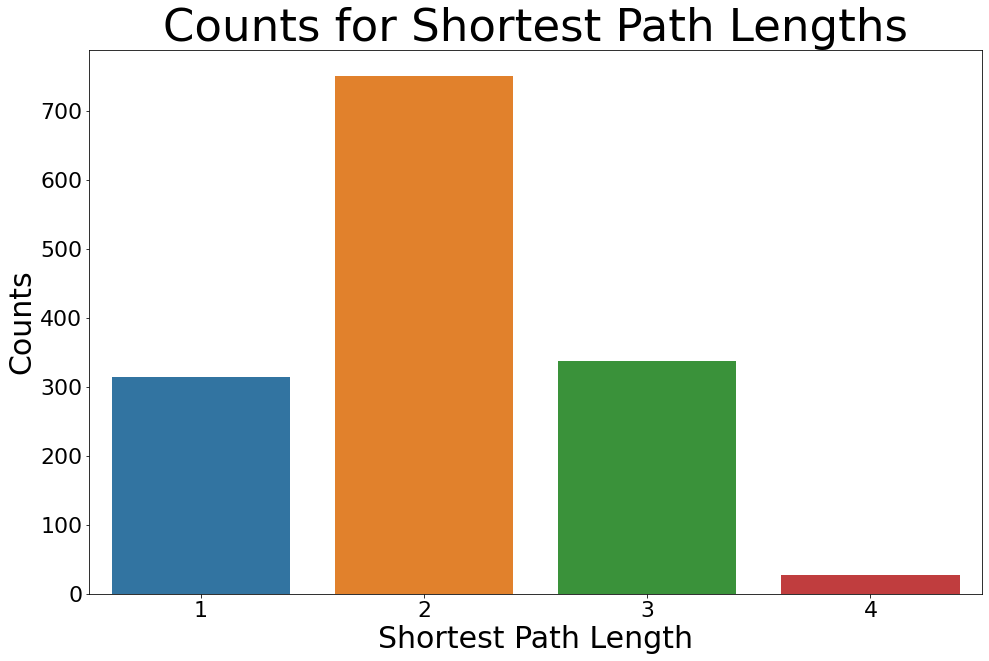

In [9]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['1','2','3','4'] , 
            y =list_counts, palette='tab10', )
plt.title('Counts for Shortest Path Lengths', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Shortest Path Length', fontdict ={'size': 30})
plt.ylabel('Counts',fontdict ={'size': 30})

* Also calculating the percentages

In [10]:
per_counts = [x / sum(list_counts)*100 for x in list_counts]
per_counts

[22.0125786163522, 52.48078266946191, 23.619846261355697, 1.8867924528301887]

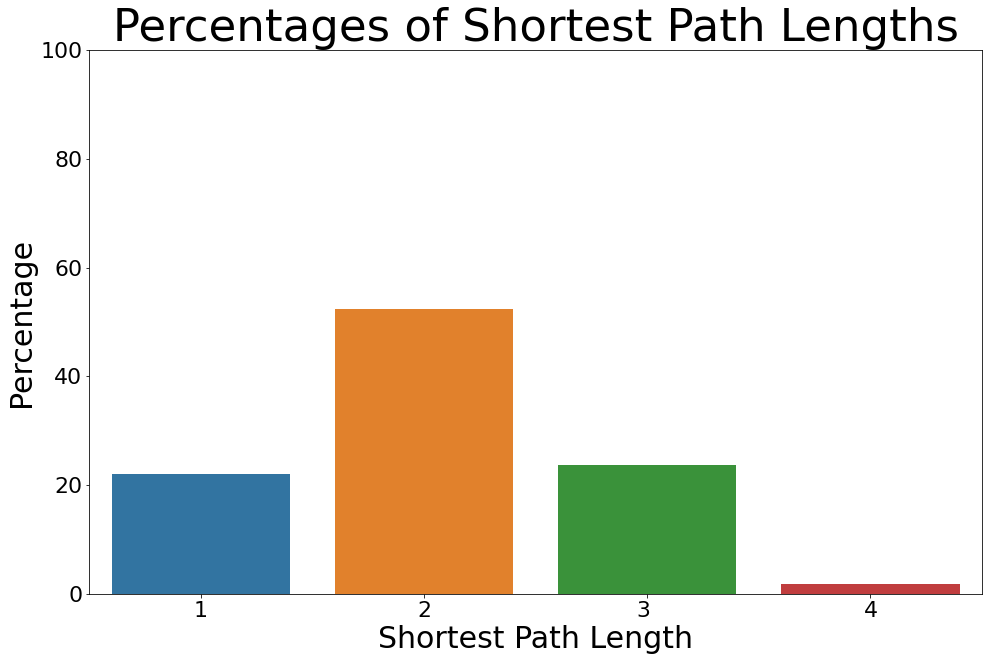

In [11]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['1','2','3 ','4'] , 
            y =per_counts, palette='tab10', )
plt.title('Percentages of Shortest Path Lengths', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Shortest Path Length', fontdict ={'size': 30})
plt.ylabel('Percentage',fontdict ={'size': 30})
ax.set_ylim(0, 100)
plt.show()

## ATTRIBUTES
* Creating a dataframe with the correspondeces of the birthplaces

In [12]:
ehtnicities = {'Birthplace': [1, 2,3,4], 'Descript': ['West Africa', 'Caribbean', 'UK','East Africa']}
ehtnicities = pd.DataFrame(data=ehtnicities)
ehtnicities

Birthplace     Descript
0           1  West Africa
1           2    Caribbean
2           3           UK
3           4  East Africa

* Now we can merge the two dataframes

In [13]:
attributes = pd.merge(attributes,ehtnicities , on='Birthplace')
attributes

Id  Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  \
0    1   20           1          0       16            4       1      1   
1    8   21           1          0       15            6       1      1   
2    9   20           1          1        9            3       0      0   
3   10   23           1          1       12            4       1      1   
4   11   21           1          0       16            8       1      0   
5   20   20           1          1        8            2       0      0   
6   21   23           1          0        4            5       0      1   
7   22   20           1          0        5            2       0      1   
8   31   17           1          0       12            4       0      0   
9   32   16           1          0       13            3       0      0   
10  40   23           1          1       18           12       1      0   
11  50   19           1          0        3            1       0      0   
12   2   20           2          0       16            7       1      0   
13   3   19           2          0       12            4       1      0   
14   4   21           2          0        8            1       0      0   
15   5   24           2          0       11            3       0      0   
16  17   27           2          0       14            8       0      0   
17  18   25           2          0       23           13       1      0   
18  19   20           2          1       22            9       1      0   
19  29   18           2          1        7            3       1      0   
20  30   19           2          1        6            3       1      0   
21  38   20           2          0        6            2       0      0   
22  41   19           2          1        8            1       0      0   
23  49   19           2          0        3            0       0      0   
24   6   25           3          1       17           10       0      0   
25  12   25           3          0        5            3       0      1   
26  13   21           3          0       19            9       1      0   
27  14   19           3          0       23            9       0      1   
28  15   21           3          0       12            9       1      0   
29  16   19           3          0       14            7       1      0   
30  27   17           3          0        3            1       0      1   
31  28   22           3          1        2            0       1      0   
32  33   18           3          1       15            6       0      0   
33  34   17           3          1        2            1       1      0   
34  35   18           3          1        7            3       0      0   
35  36   17           3          1        7            2       1      0   
36  37   17           3          0        6            1       0      0   
37  39   22           3          1        4            3       0      0   
38  42   18           3          0        7            4       0      0   
39  43   18           3          1        6            0       0      0   
40  44   18           3          1        7            1       0      0   
41  45   19           3          0       23           11       1      0   
42  46   18           3          0        5            2       1      0   
43  47   16           3          1        1            0       0      0   
44  48   20           3          1       12            9       1      0   
45  51   17           3          0        4            1       0      0   
46  52   18           3          0        1            0       0      0   
47  54   20           3          0       11            4       1      0   
48   7   20           4          1        8            1       0      1   
49  23   19           4          0       19            9       1      0   
50  24   16           4          0        0            0       0      0   
51  25   17           4          0        8            2       1      0   
52  26   18           4      

* MEAN AND MEDIAN statistics

In [14]:
attributes[['Age','Arrests','Convictions']].mean()

Age            19.833333
Arrests         9.907407
Convictions     4.203704
dtype: float64

In [15]:
attributes[['Age','Arrests','Convictions']].median()

Age            19.0
Arrests         8.0
Convictions     3.0
dtype: float64

* MAX AND MIN statistics

In [16]:
attributes[['Age','Arrests','Convictions']].max()

Age            27
Arrests        23
Convictions    13
dtype: int64

In [17]:
attributes[['Age','Arrests','Convictions']].min()

Age            16
Arrests         0
Convictions     0
dtype: int64

Text(0.5, 0, 'Age')

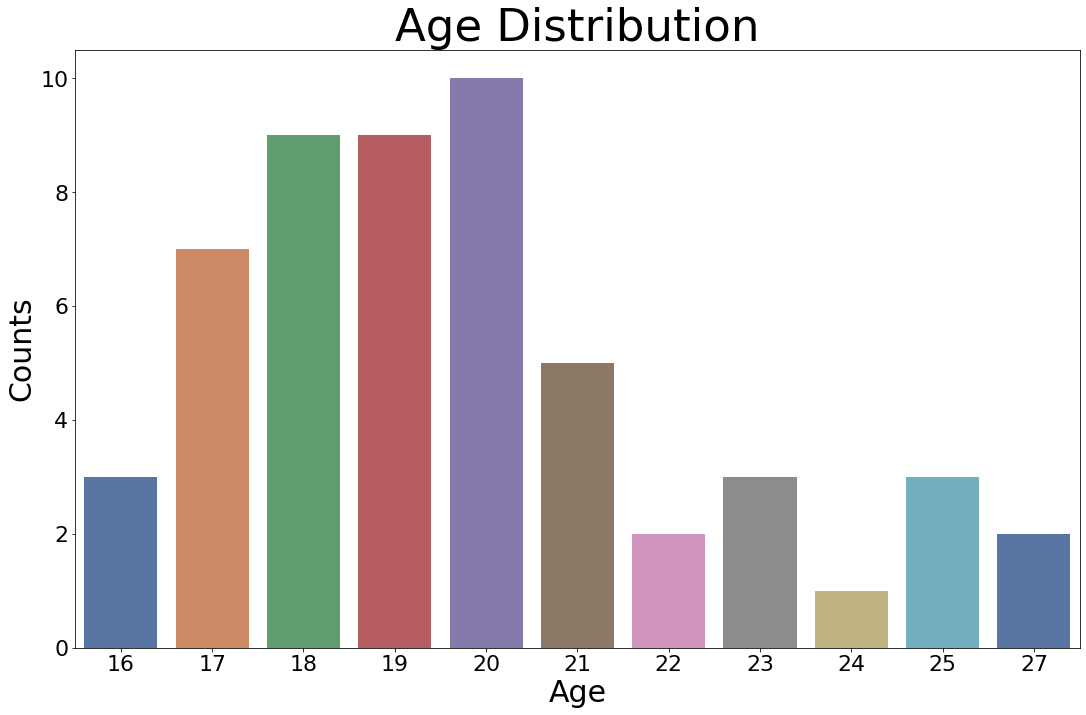

In [18]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (18, 11)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= attributes.Age.value_counts().index , 
            y =attributes.Age.value_counts().values, 
            palette='deep', )
plt.title('Age Distribution', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Counts',fontdict ={'size': 30})
plt.xlabel('Age',fontdict ={'size': 30})

* Number of members who served time in jail

(0.0, 100.0)

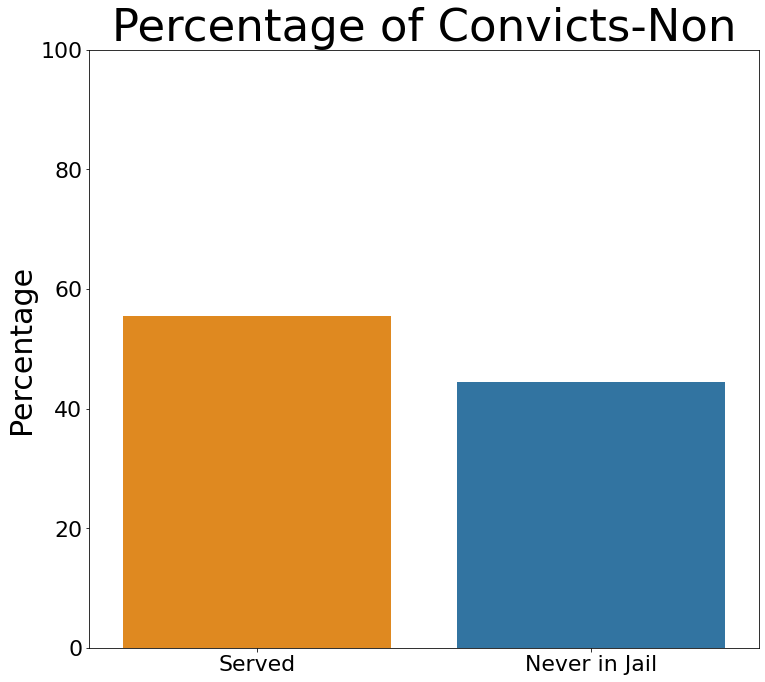

In [19]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (12, 11)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['Served','Never in Jail'] , 
            y =attributes.Prison.value_counts()/sum(attributes.Prison.value_counts())*100, 
            palette=['darkorange','tab:blue'], )
plt.title('Percentage of Convicts-Non', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Percentage',fontdict ={'size': 30})
ax.set_ylim(0, 100)

* Members per birthplace

Text(0, 0.5, 'Region')

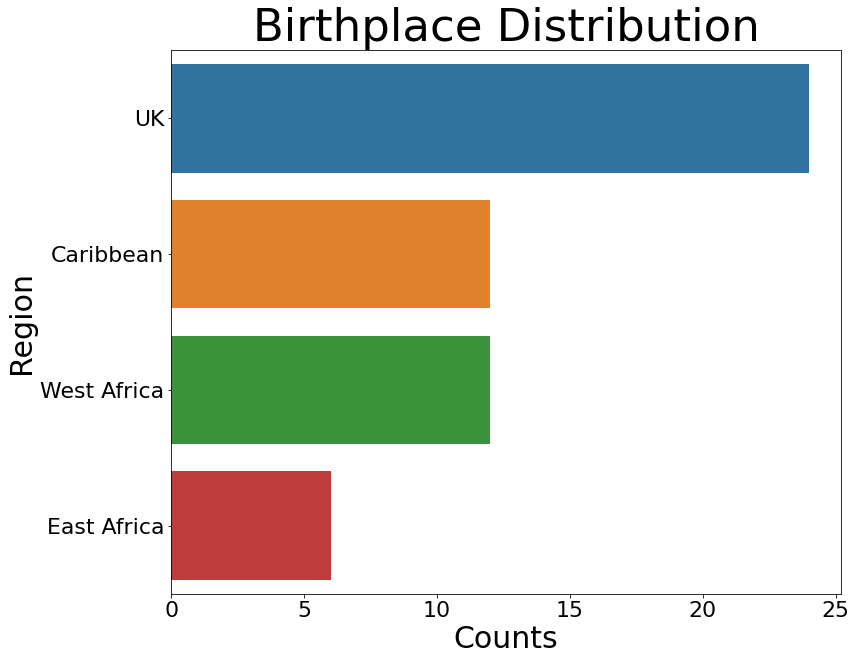

In [20]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= attributes.Descript.value_counts().index , 
            x =attributes.Descript.value_counts().values, 
            palette='tab10', )
plt.title('Birthplace Distribution', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Counts',fontdict ={'size': 30})
plt.ylabel('Region',fontdict ={'size': 30})

In [21]:
attributes.Descript.value_counts()/ sum(attributes.Descript.value_counts())

UK             0.444444
Caribbean      0.222222
West Africa    0.222222
East Africa    0.111111
Name: Descript, dtype: float64

* Calculating density of the graph

In [22]:
nx.density(G)

0.22012578616352202

* `Music` attribute

(0.0, 100.0)

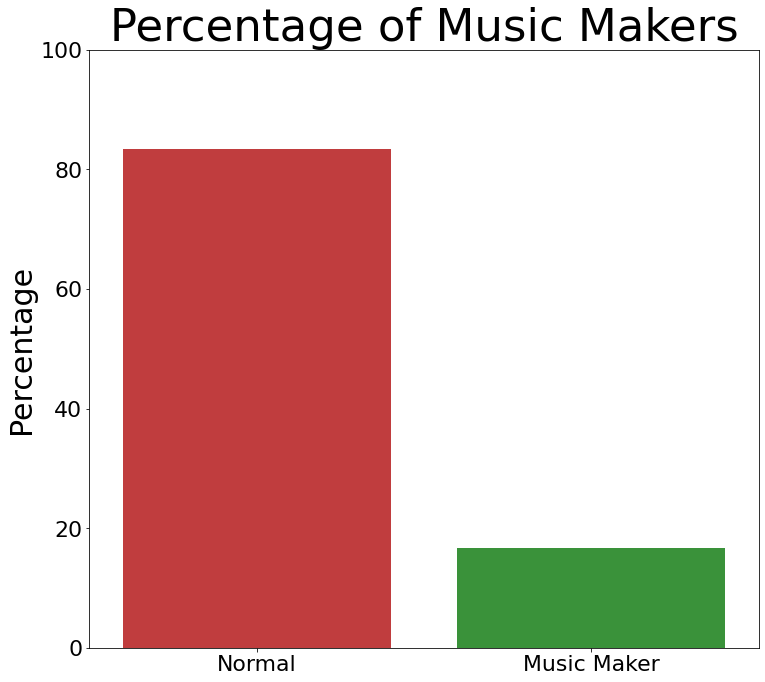

In [23]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (12, 11)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['Normal','Music Maker'] , 
            y =attributes.Music.value_counts()/sum(attributes.Music.value_counts())*100, 
            palette=['tab:red','tab:green'], )
plt.title('Percentage of Music Makers', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Percentage',fontdict ={'size': 30})
ax.set_ylim(0, 100)

* `Ranking` attribute

Text(0.5, 0, 'Ranking')

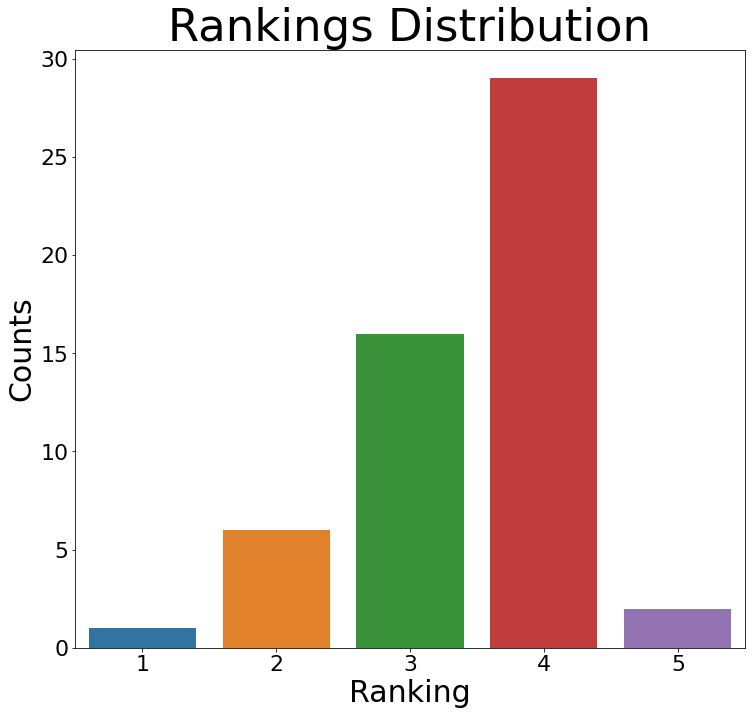

In [24]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (12, 11)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= attributes.Ranking.value_counts().index , 
            y =attributes.Ranking.value_counts(), 
            palette='tab10', )
plt.title('Rankings Distribution', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Counts',fontdict ={'size': 30})
plt.xlabel('Ranking',fontdict ={'size': 30})

In [25]:
attributes[['Id', 'Ranking']]

Id  Ranking
0    1        1
1    8        3
2    9        3
3   10        3
4   11        3
5   20        3
6   21        4
7   22        3
8   31        4
9   32        4
10  40        4
11  50        5
12   2        2
13   3        2
14   4        2
15   5        2
16  17        4
17  18        3
18  19        3
19  29        3
20  30        3
21  38        4
22  41        4
23  49        4
24   6        2
25  12        3
26  13        3
27  14        3
28  15        4
29  16        4
30  27        4
31  28        3
32  33        4
33  34        4
34  35        4
35  36        4
36  37        4
37  39        4
38  42        4
39  43        4
40  44        4
41  45        4
42  46        4
43  47        4
44  48        4
45  51        4
46  52        5
47  54        3
48   7        2
49  23        3
50  24        4
51  25        4
52  26        4
53  53        4

## Degree Measures
* Let's find the average degree 

In [26]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 54
Number of edges: 315
Average degree:  11.6667


* A new dataframe is created with the degree for each node

In [27]:
degrees = pd.DataFrame.from_dict(nx.degree(G))
degrees = degrees.rename(columns={0:'node', 1:'degree'})
degrees

node  degree
0     54       6
1     53       2
2     52       4
3     51       7
4     50       2
5     49       3
6     48       5
7     47       3
8     46       5
9     45       2
10    44       4
11    43       6
12    42       5
13    41       5
14    40       2
15    39       2
16    38       2
17    37       7
18    36      12
19    35      12
20    34       8
21    33      10
22    32       7
23    31      12
24    30       5
25    29      17
26    28      18
27    27       8
28    26       6
29    25      23
30    24       6
31    23      23
32    22      24
33    21      19
34    20      15
35    19      13
36    18      14
37    17       5
38    16       8
39    15       7
40    14      24
41    13      11
42    12      25
43    11      18
44    10      22
45     9      21
46     8      15
47     7      25
48     6      16
49     5      19
50     4      21
51     3      22
52     2      22
53     1      25

* Average degree

In [28]:
degrees.degree.mean()

11.666666666666666

* Maximum degree

In [29]:
degrees.degree.max()

25

* Minimum degree

In [30]:
degrees.degree.min()

2

* Median degree

In [31]:
degrees.degree.median()

9.0

* Degree Distribution

In [32]:
degrees_valuecounts = degrees.degree.value_counts()
degrees_valuecounts = degrees_valuecounts.reset_index()
degrees_valuecounts = degrees_valuecounts.sort_values('index')
degrees_valuecounts = degrees_valuecounts.rename(columns={'degree':'count','index':'degree'})

In [33]:
degrees_valuecounts

degree  count
0        2      6
15       3      2
14       4      2
1        5      6
2        6      4
3        7      4
5        8      3
20      10      1
19      11      1
4       12      3
21      13      1
18      14      1
8       15      2
17      16      1
16      17      1
10      18      2
11      19      2
12      21      2
7       22      3
13      23      2
9       24      2
6       25      3

Text(0, 0.5, 'Counts')

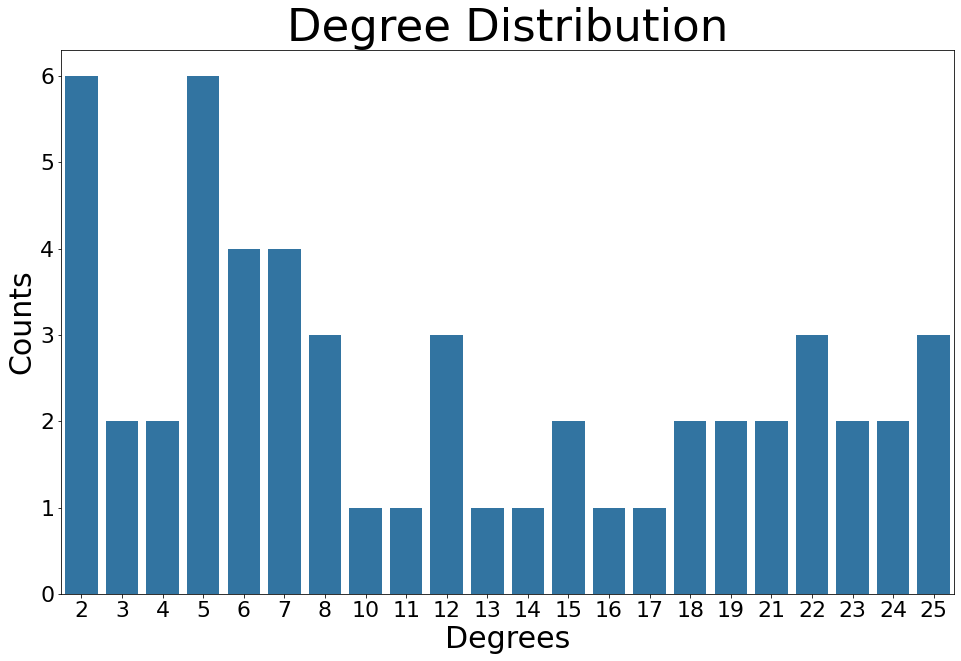

In [34]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= degrees_valuecounts['count'] , 
            x =degrees_valuecounts.degree, 
            palette=['tab:blue'], )
plt.title('Degree Distribution', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Degrees',fontdict ={'size': 30})
plt.ylabel('Counts',fontdict ={'size': 30})

Nodes with maximum degree

In [35]:
degrees.loc[degrees.degree >= degrees.degree.max()-3]

node  degree
29    25      23
31    23      23
32    22      24
40    14      24
42    12      25
44    10      22
47     7      25
51     3      22
52     2      22
53     1      25

* Nodes with maximum degree

In [36]:
degrees.loc[(degrees.degree >=13)& (degrees.degree <=20)].node.values

array([29, 28, 21, 20, 19, 18, 11,  8,  6,  5], dtype=int64)

## BETWEENNESS CENTRALITY

In [37]:
nx.betweenness_centrality(G)

{54: 0.0024102547489694612,
 53: 0.0002800906475186515,
 52: 0.0,
 51: 0.005896965581636765,
 50: 0.0,
 49: 0.0,
 48: 0.0021141402506960655,
 47: 0.00039473549933486876,
 46: 0.005031696176038718,
 45: 0.0,
 44: 0.007410498977570827,
 43: 0.00960356167320419,
 42: 0.0034510562812449606,
 41: 0.0006399261116242248,
 40: 0.0,
 39: 0.0,
 38: 0.0,
 37: 0.0013040663535278155,
 36: 0.004973879009427997,
 35: 0.004973879009427997,
 34: 0.0007316078156170362,
 33: 0.003660681251302314,
 32: 0.001430454819851217,
 31: 0.0046242204615772895,
 30: 6.597176408497163e-05,
 29: 0.013912384752487949,
 28: 0.02751077824676916,
 27: 0.00022446775082173446,
 26: 0.0007175345618741846,
 25: 0.055702682123812915,
 24: 0.0007175345618741846,
 23: 0.05574677827644192,
 22: 0.04500243939482215,
 21: 0.010741028565712452,
 20: 0.06367993791967962,
 19: 0.04730038551415635,
 18: 0.0445105372956714,
 17: 0.0,
 16: 0.0029378307925540486,
 15: 0.001036648560233466,
 14: 0.06402652077400327,
 13: 0.004166919996020

## CLOSENESS CENTRALITY

In [38]:
nx.closeness_centrality(G)

{54: 0.4690265486725664,
 53: 0.3680555555555556,
 52: 0.39849624060150374,
 51: 0.452991452991453,
 50: 0.35570469798657717,
 49: 0.40458015267175573,
 48: 0.4491525423728814,
 47: 0.42063492063492064,
 46: 0.45689655172413796,
 45: 0.4015151515151515,
 44: 0.452991452991453,
 43: 0.4274193548387097,
 42: 0.381294964028777,
 41: 0.45689655172413796,
 40: 0.35570469798657717,
 39: 0.3925925925925926,
 38: 0.4108527131782946,
 37: 0.4274193548387097,
 36: 0.5096153846153846,
 35: 0.5096153846153846,
 34: 0.452991452991453,
 33: 0.49074074074074076,
 32: 0.43089430894308944,
 31: 0.4953271028037383,
 30: 0.43089430894308944,
 29: 0.5638297872340425,
 28: 0.5698924731182796,
 27: 0.5096153846153846,
 26: 0.424,
 25: 0.6091954022988506,
 24: 0.424,
 23: 0.6091954022988506,
 22: 0.6091954022988506,
 21: 0.5760869565217391,
 20: 0.5247524752475248,
 19: 0.5096153846153846,
 18: 0.5463917525773195,
 17: 0.4491525423728814,
 16: 0.4690265486725664,
 15: 0.45689655172413796,
 14: 0.602272727272

In [39]:
nx.edges(G, 12)

EdgeDataView([(12, 44), (12, 37), (12, 36), (12, 35), (12, 34), (12, 33), (12, 29), (12, 27), (12, 25), (12, 23), (12, 22), (12, 21), (12, 18), (12, 14), (12, 11), (12, 10), (12, 9), (12, 8), (12, 7), (12, 6), (12, 5), (12, 4), (12, 3), (12, 2), (12, 1)])

## Eigenvector Centrality

In [40]:
nx.eigenvector_centrality(G)

{54: 0.0596711628291724,
 53: 0.0087889292883314,
 52: 0.03286571738564915,
 51: 0.045400737060988065,
 50: 0.010725356168024787,
 49: 0.02922994601975459,
 48: 0.05325182618560996,
 47: 0.02765692299991966,
 46: 0.043167413982664146,
 45: 0.01644939331222185,
 44: 0.027195589458704716,
 43: 0.022191808078925224,
 42: 0.01629756257260202,
 41: 0.046751217194967026,
 40: 0.010725356168024787,
 39: 0.025755480755314725,
 38: 0.02556547825075343,
 37: 0.056383044878599825,
 36: 0.11438907657538216,
 35: 0.11438907657538216,
 34: 0.07570360563139175,
 33: 0.09525632012351404,
 32: 0.07479043010162997,
 31: 0.12620154526079513,
 30: 0.05172298398480159,
 29: 0.1917311208727059,
 28: 0.17804782619655085,
 27: 0.10528411057634135,
 26: 0.05580916272965096,
 25: 0.21781693512406783,
 24: 0.05580916272965096,
 23: 0.22965681635240887,
 22: 0.2351956670087189,
 21: 0.21530464953631728,
 20: 0.10320090206015389,
 19: 0.0792468055912971,
 18: 0.12731639557188454,
 17: 0.050626115167417336,
 16: 0.

## REGRESSION IDEAS

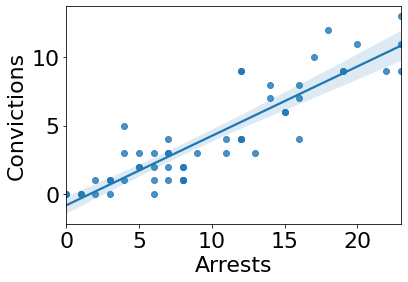

In [41]:
import seaborn as sns; 
ax = sns.regplot(x="Arrests", y="Convictions", data=attributes)

## CLUSTERING EFFECTS
* Calculating the average clustering coeeficient

In [42]:
nx.average_clustering(G,)

0.6331465409311988

* Creating a histogram to showcase the clustering coefficient distribution

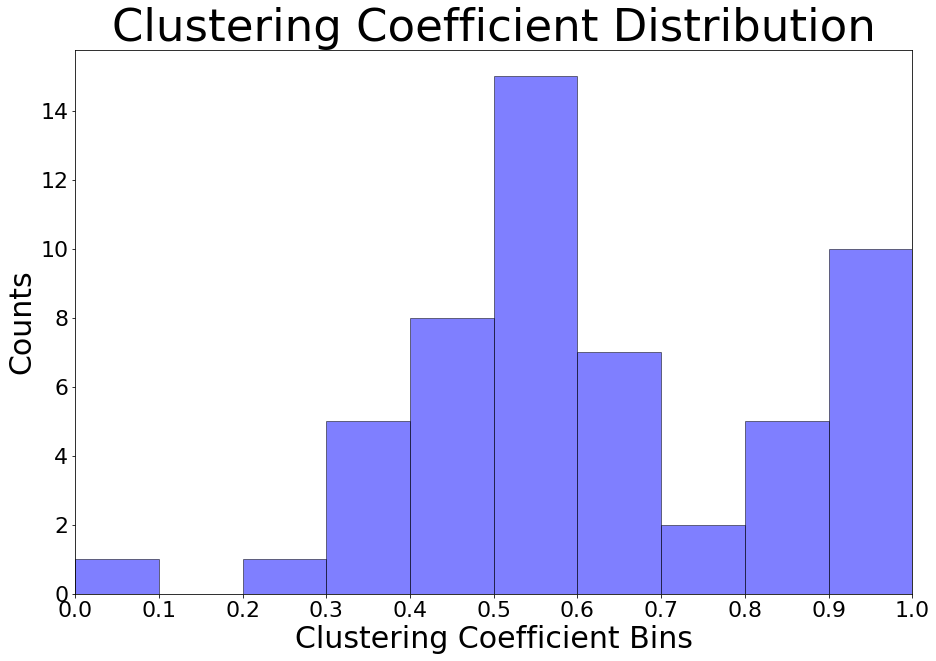

In [43]:
cluster_values = list(nx.clustering(G).values()) #creating list from dictionary values of clustering coefficients
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
plt.hist(bins=np.linspace(0., 1., 11), x=cluster_values,
                        color='blue', edgecolor='black', alpha=0.5, )
ax.set_xlim(0, 1)
plt.xticks(np.linspace(0., 1., 11))
plt.title('Clustering Coefficient Distribution', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Clustering Coefficient Bins',fontdict ={'size': 30})
plt.ylabel('Counts',fontdict ={'size': 30})
plt.show()

* Calculating the sum of all unique triangles

In [44]:
sum(list(nx.triangles(G).values()))/3 #deviding with 3 because each triangle is counted once for each node

860.0

* Average number of triangles a node belongs to

In [45]:
np.mean(list(nx.triangles(G).values())) 

47.77777777777778

## BRIDGES

In [46]:
nx.has_bridges(G)

False

* Finding the local bridges

In [47]:
 for local in nx.local_bridges(G):
        print (local)

(53, 43, 3)
(53, 18, 3)


## HOMOPHILY
* Setting up the attributes for each different node with `set_node_attributes`

In [48]:
node_attr = attributes.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G, node_attr)

* Let's check the attribute `Birthplace` for all nodes

In [49]:
nx.get_node_attributes(G,'Descript')

{54: 'UK',
 53: 'East Africa',
 52: 'UK',
 51: 'UK',
 50: 'West Africa',
 49: 'Caribbean',
 48: 'UK',
 47: 'UK',
 46: 'UK',
 45: 'UK',
 44: 'UK',
 43: 'UK',
 42: 'UK',
 41: 'Caribbean',
 40: 'West Africa',
 39: 'UK',
 38: 'Caribbean',
 37: 'UK',
 36: 'UK',
 35: 'UK',
 34: 'UK',
 33: 'UK',
 32: 'West Africa',
 31: 'West Africa',
 30: 'Caribbean',
 29: 'Caribbean',
 28: 'UK',
 27: 'UK',
 26: 'East Africa',
 25: 'East Africa',
 24: 'East Africa',
 23: 'East Africa',
 22: 'West Africa',
 21: 'West Africa',
 20: 'West Africa',
 19: 'Caribbean',
 18: 'Caribbean',
 17: 'Caribbean',
 16: 'UK',
 15: 'UK',
 14: 'UK',
 13: 'UK',
 12: 'UK',
 11: 'West Africa',
 10: 'West Africa',
 9: 'West Africa',
 8: 'West Africa',
 7: 'East Africa',
 6: 'UK',
 5: 'Caribbean',
 4: 'Caribbean',
 3: 'Caribbean',
 2: 'Caribbean',
 1: 'West Africa'}

* Firstly, the degree assortativity coefficient is found

In [50]:
nx.degree_assortativity_coefficient(G)

0.0226245269341033

Now we calculate the assortativity coefficient for categorical attributes
* Attribute `Birthplace`

In [51]:
nx.attribute_assortativity_coefficient(G,'Descript')

0.11317444577736785

* Attribute `Prison`

In [52]:
nx.attribute_assortativity_coefficient(G,'Prison')

0.014880201765447642

* Attribute `music`

In [53]:
nx.attribute_assortativity_coefficient(G,'Music')

0.09501333880566394

* Attribute `ranking`

In [54]:
nx.attribute_assortativity_coefficient(G,'Ranking')

0.028815929975485332

The assortativity coefficient for numerical attributes is found next
* Attribute `Age`

In [55]:
nx.numeric_assortativity_coefficient(G,'Age')

0.15167532832882372

* Attribute `Arrests`

In [56]:
nx.numeric_assortativity_coefficient(G,'Arrests')

0.07194567096332875

* Attribute `Convictions`

In [57]:
nx.numeric_assortativity_coefficient(G,'Convictions')

0.09718640151746134

## Homophily smaller graphs
#### Creating a graph that only includes the relationships of co-offending (edge values of 2, 3 and 4)

In [58]:
edges_crimes = edges.replace([1],0)
G2 = nx.from_pandas_adjacency(edges_crimes)
node_attr = attributes.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G2, node_attr)
G2

* Attribute `Age` assortativity coefficient

In [59]:
nx.numeric_assortativity_coefficient(G2,'Age')

0.3711122206232127

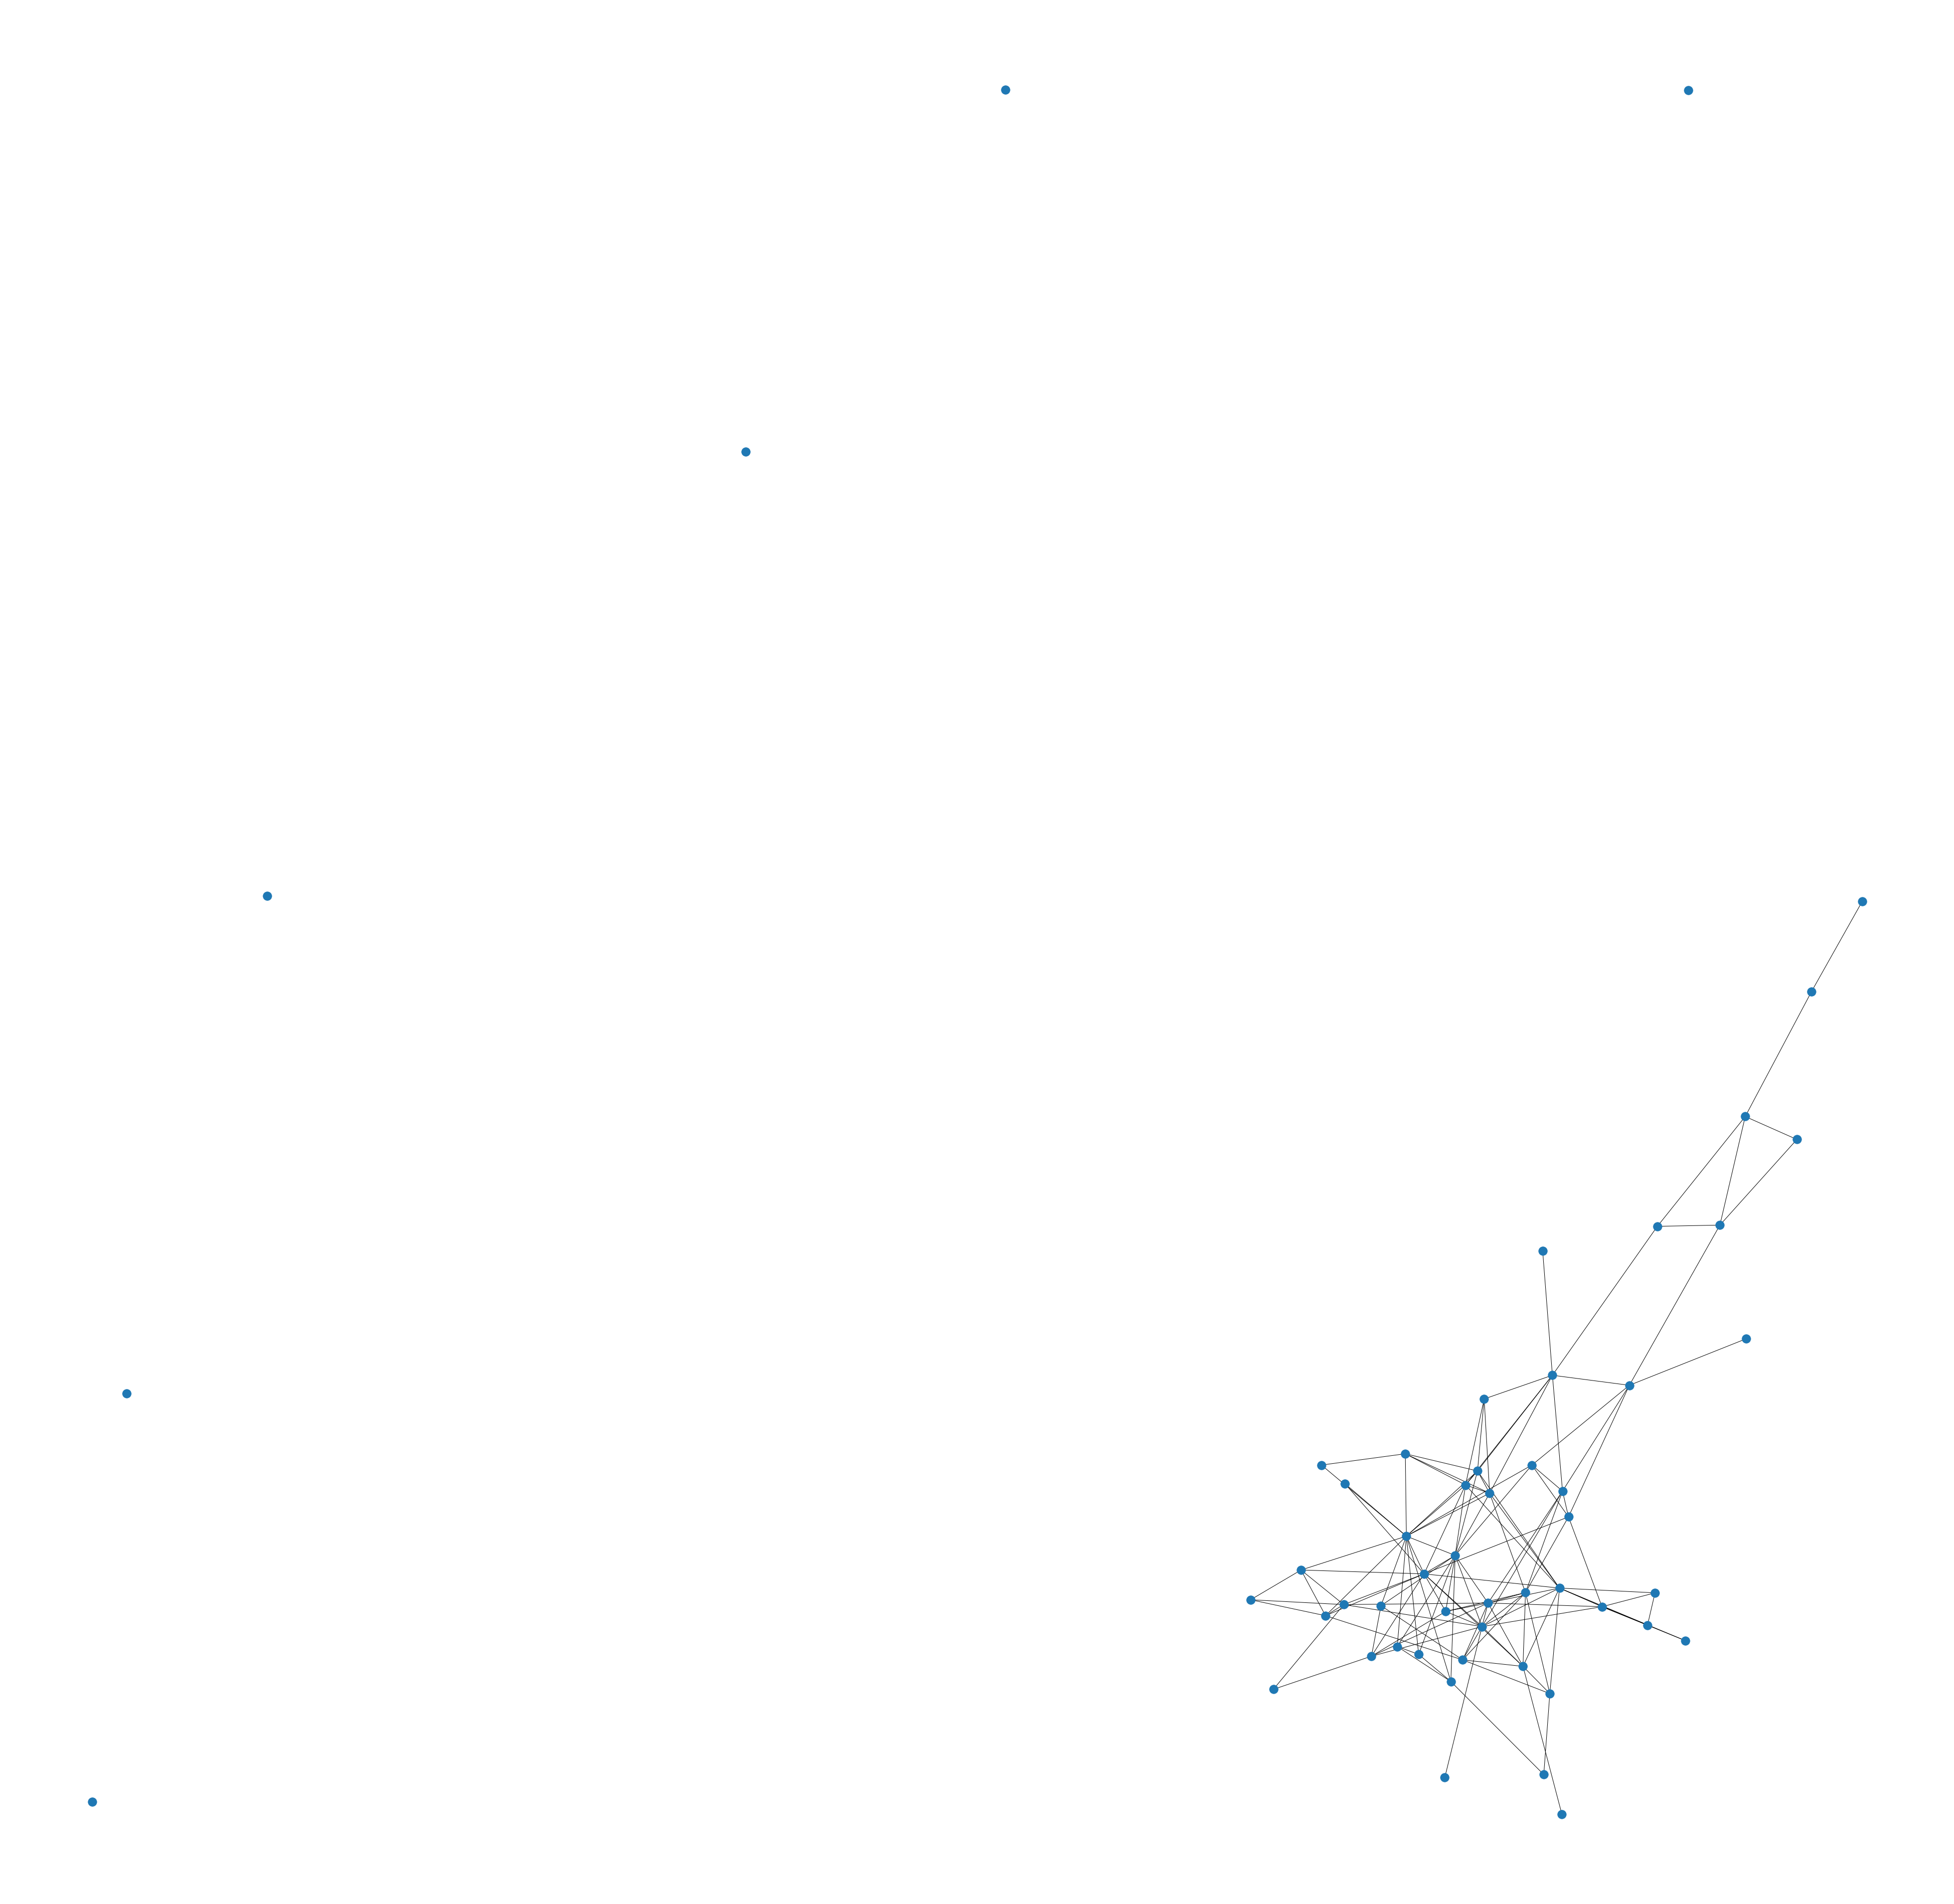

In [60]:
fig_dims = (70, 70)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G2, )

#### Creating a graph that only includes the relationships of executing serious crimes (edge values of 3 and 4)

In [61]:
edges_crimes = edges.replace([1,2],0)
G3 = nx.from_pandas_adjacency(edges_crimes)
node_attr = attributes.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G3, node_attr)
G3

* Attribute `Birthplace` assortativity coefficient

In [62]:
nx.attribute_assortativity_coefficient(G3,'Descript')

0.40699075934110096

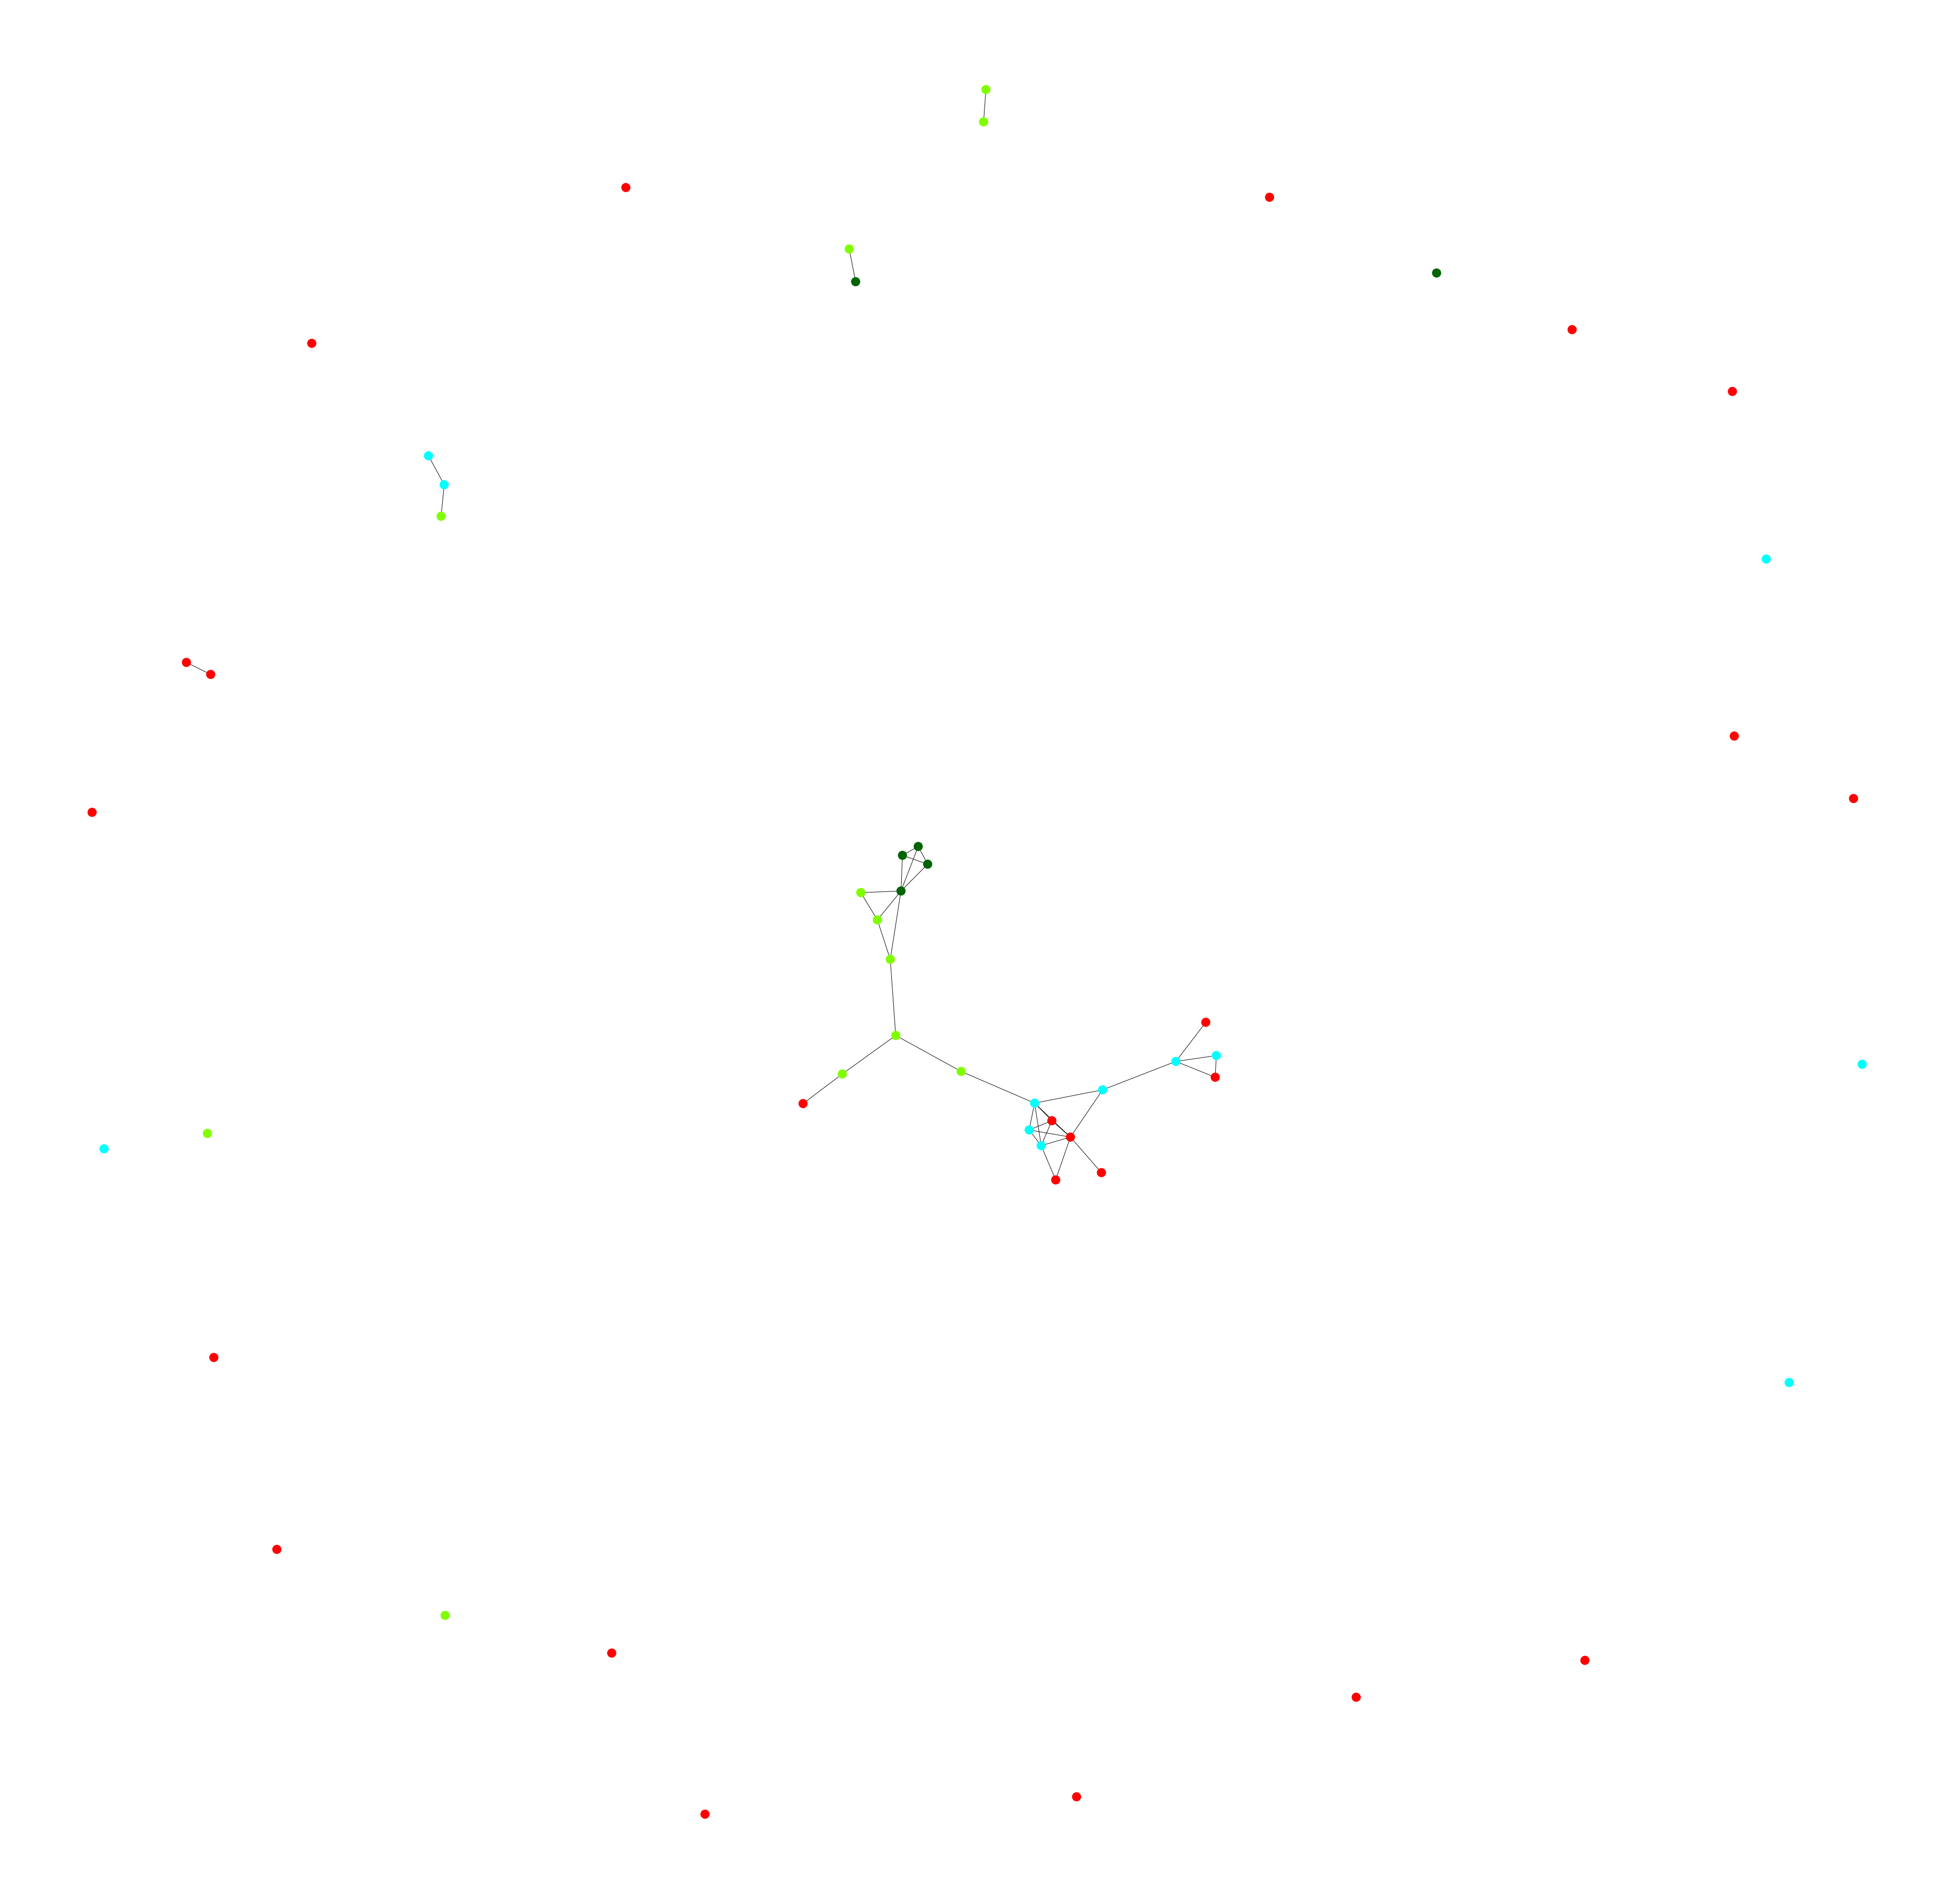

In [63]:
node_color=[]
for node in G3.nodes(data=True):

    # if the node has the attribute group1
    if 'West Africa' in node[1]['Descript']:
        node_color.append('chartreuse')

    # if the node has the attribute group1
    elif 'East Africa' in node[1]['Descript']:
        node_color.append('darkgreen')

    # if the node has the attribute group1
    elif 'UK' in node[1]['Descript']:
        node_color.append('red')

    # if the node has the attribute group1
    elif 'Caribbean' in node[1]['Descript']:
        node_color.append('aqua')


fig_dims = (70, 70)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G3, node_color=node_color, )

#### Creating a graph that only includes the relationships of executing serious crimes and being family (edge values of 4)

In [64]:
edges_crimes = edges.replace([1,2,3],0)
G4 = nx.from_pandas_adjacency(edges_crimes)
node_attr = attributes.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G4, node_attr)
G4

* Attribute `Birthplace` assortativity coefficient

In [65]:
nx.attribute_assortativity_coefficient(G4,'Descript')

0.8160919540229885

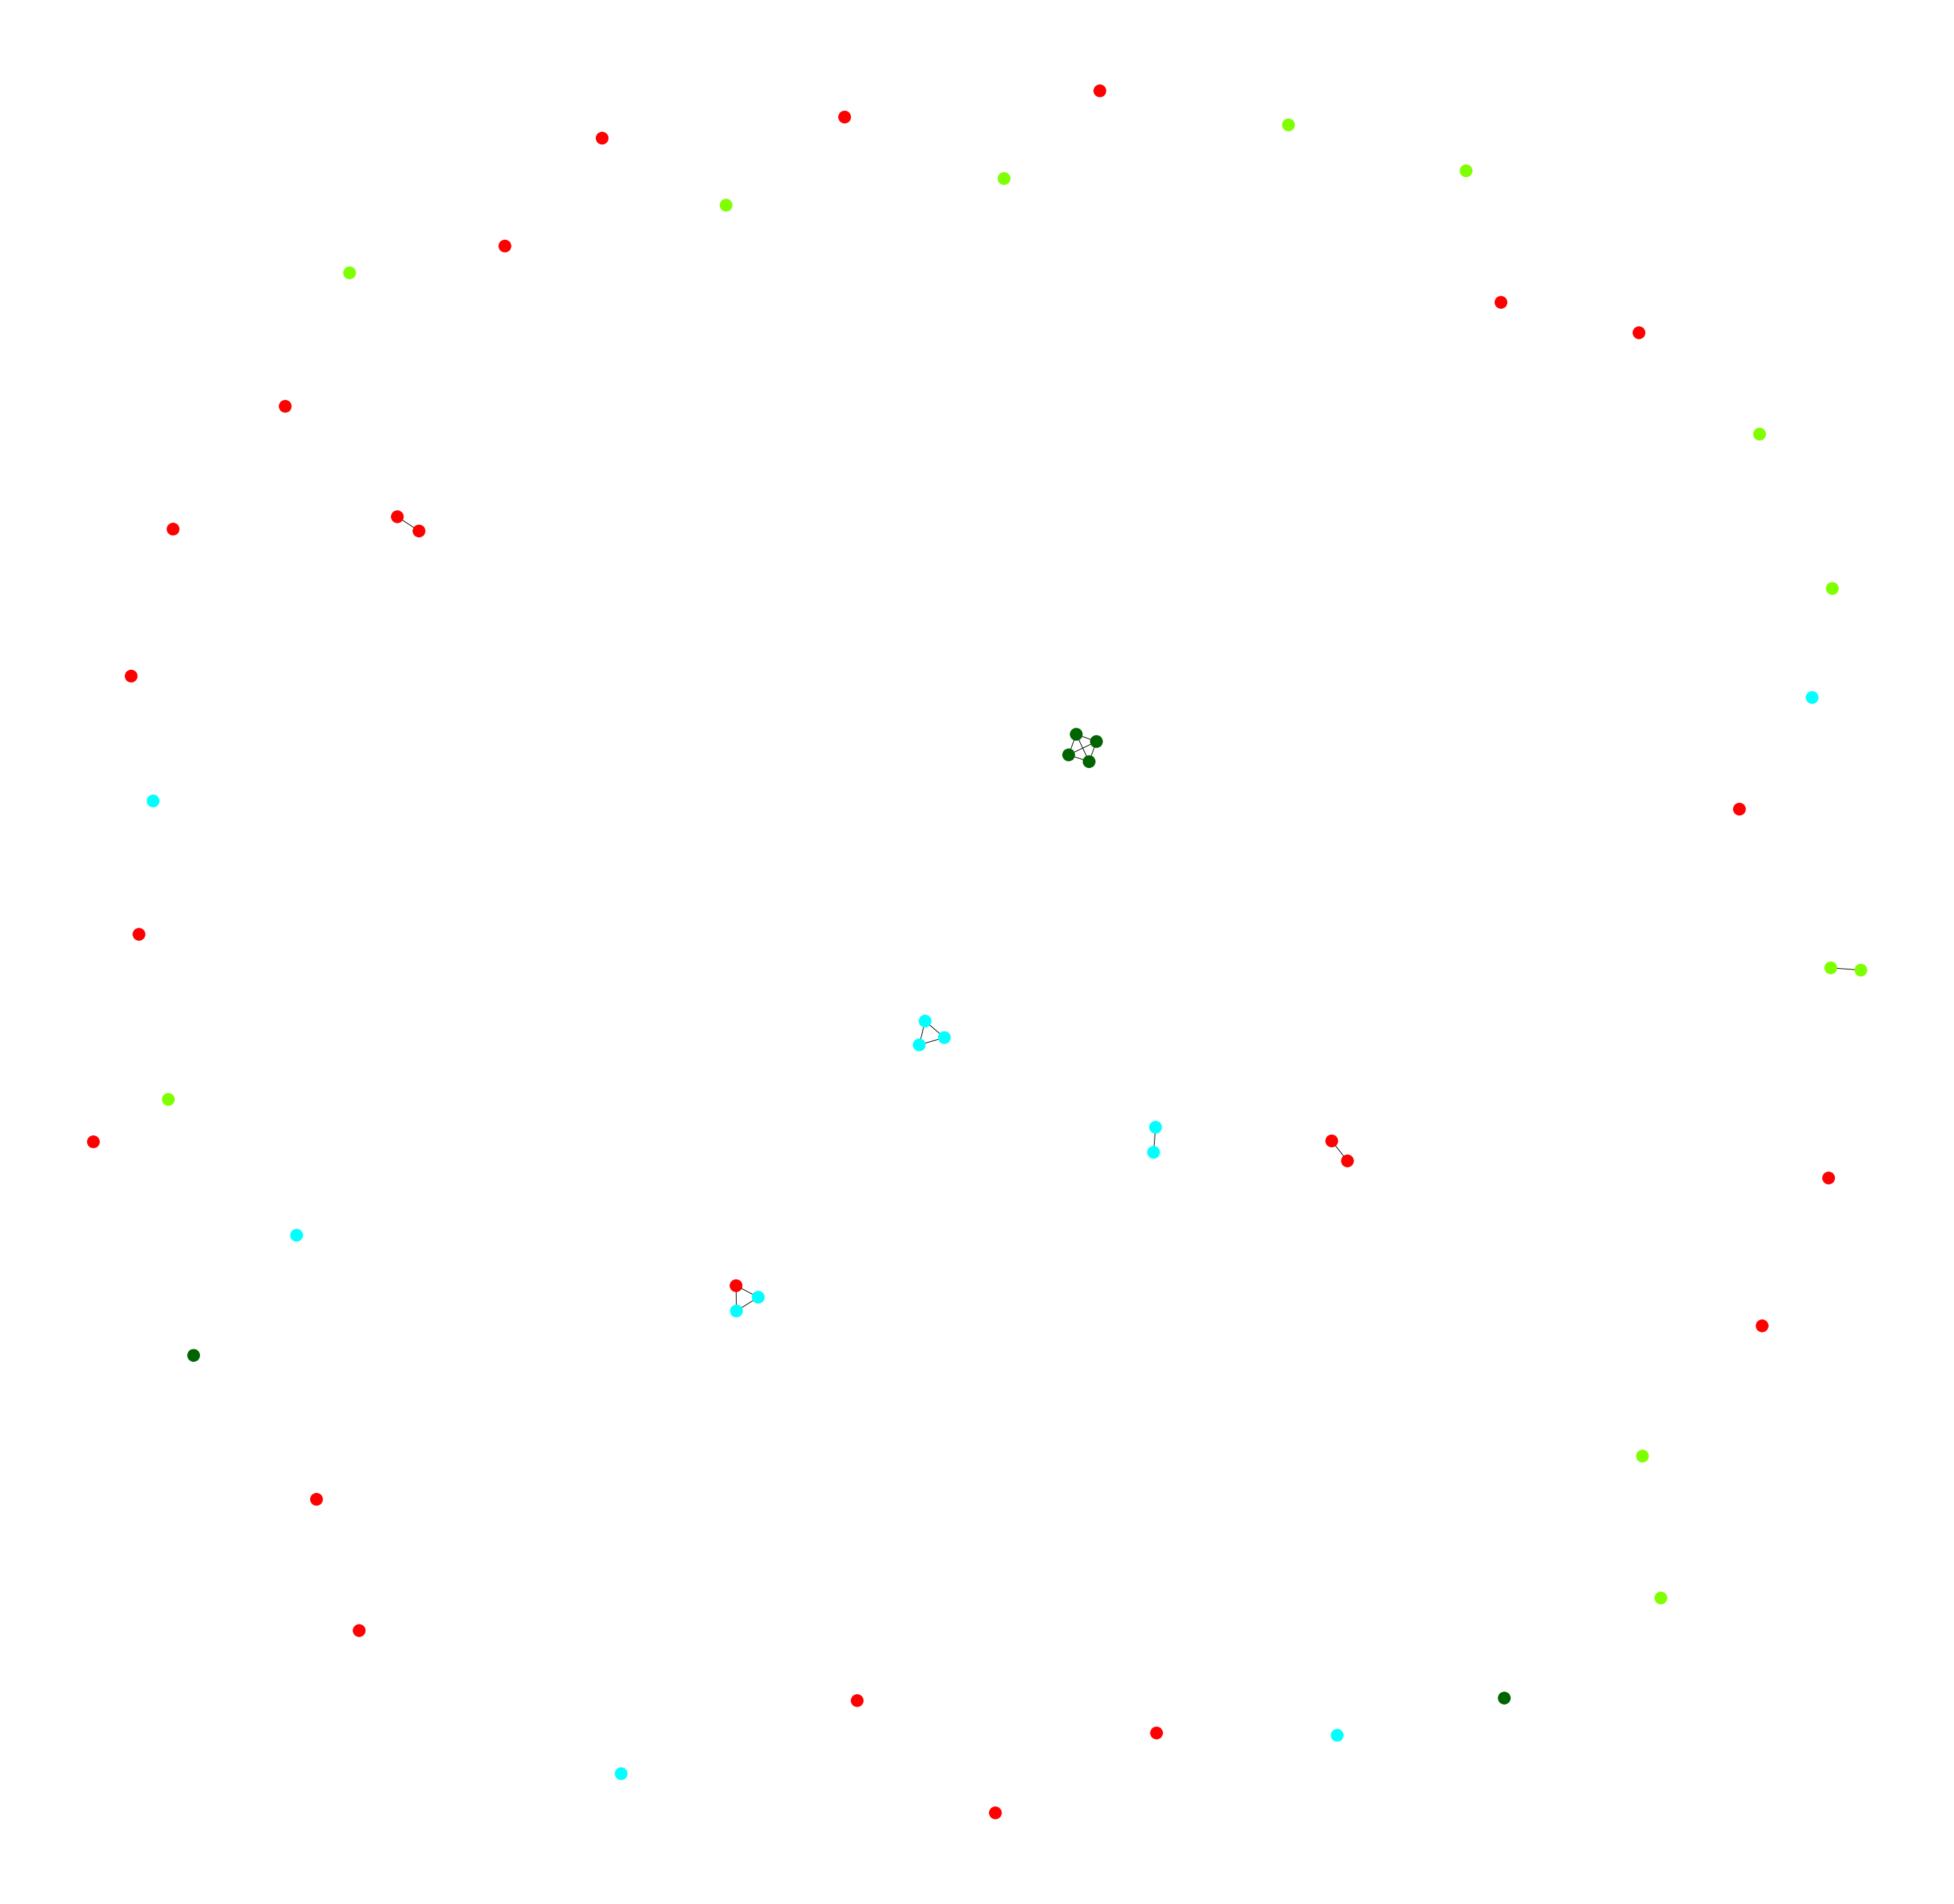

In [66]:
node_color=[]
for node in G4.nodes(data=True):

    # if the node has the attribute group1
    if 'West Africa' in node[1]['Descript']:
        node_color.append('chartreuse')

    # if the node has the attribute group1
    elif 'East Africa' in node[1]['Descript']:
        node_color.append('darkgreen')

    # if the node has the attribute group1
    elif 'UK' in node[1]['Descript']:
        node_color.append('red')

    # if the node has the attribute group1
    elif 'Caribbean' in node[1]['Descript']:
        node_color.append('aqua')


fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G4, node_color=node_color,)

## Cliques

for clique in nx.enumerate_all_cliques(G):
    print(clique[:])

In [67]:
max_cliques=[]
max_clique_size = nx.graph_clique_number(G)
for clique in nx.find_cliques(G):
    if len(clique)== max_clique_size:
        max_cliques.append(clique)
max_cliques

[[1, 7, 12, 2, 9, 10, 21, 22, 29, 8, 11, 23],
 [1, 7, 12, 2, 9, 10, 21, 22, 29, 25, 11, 23]]

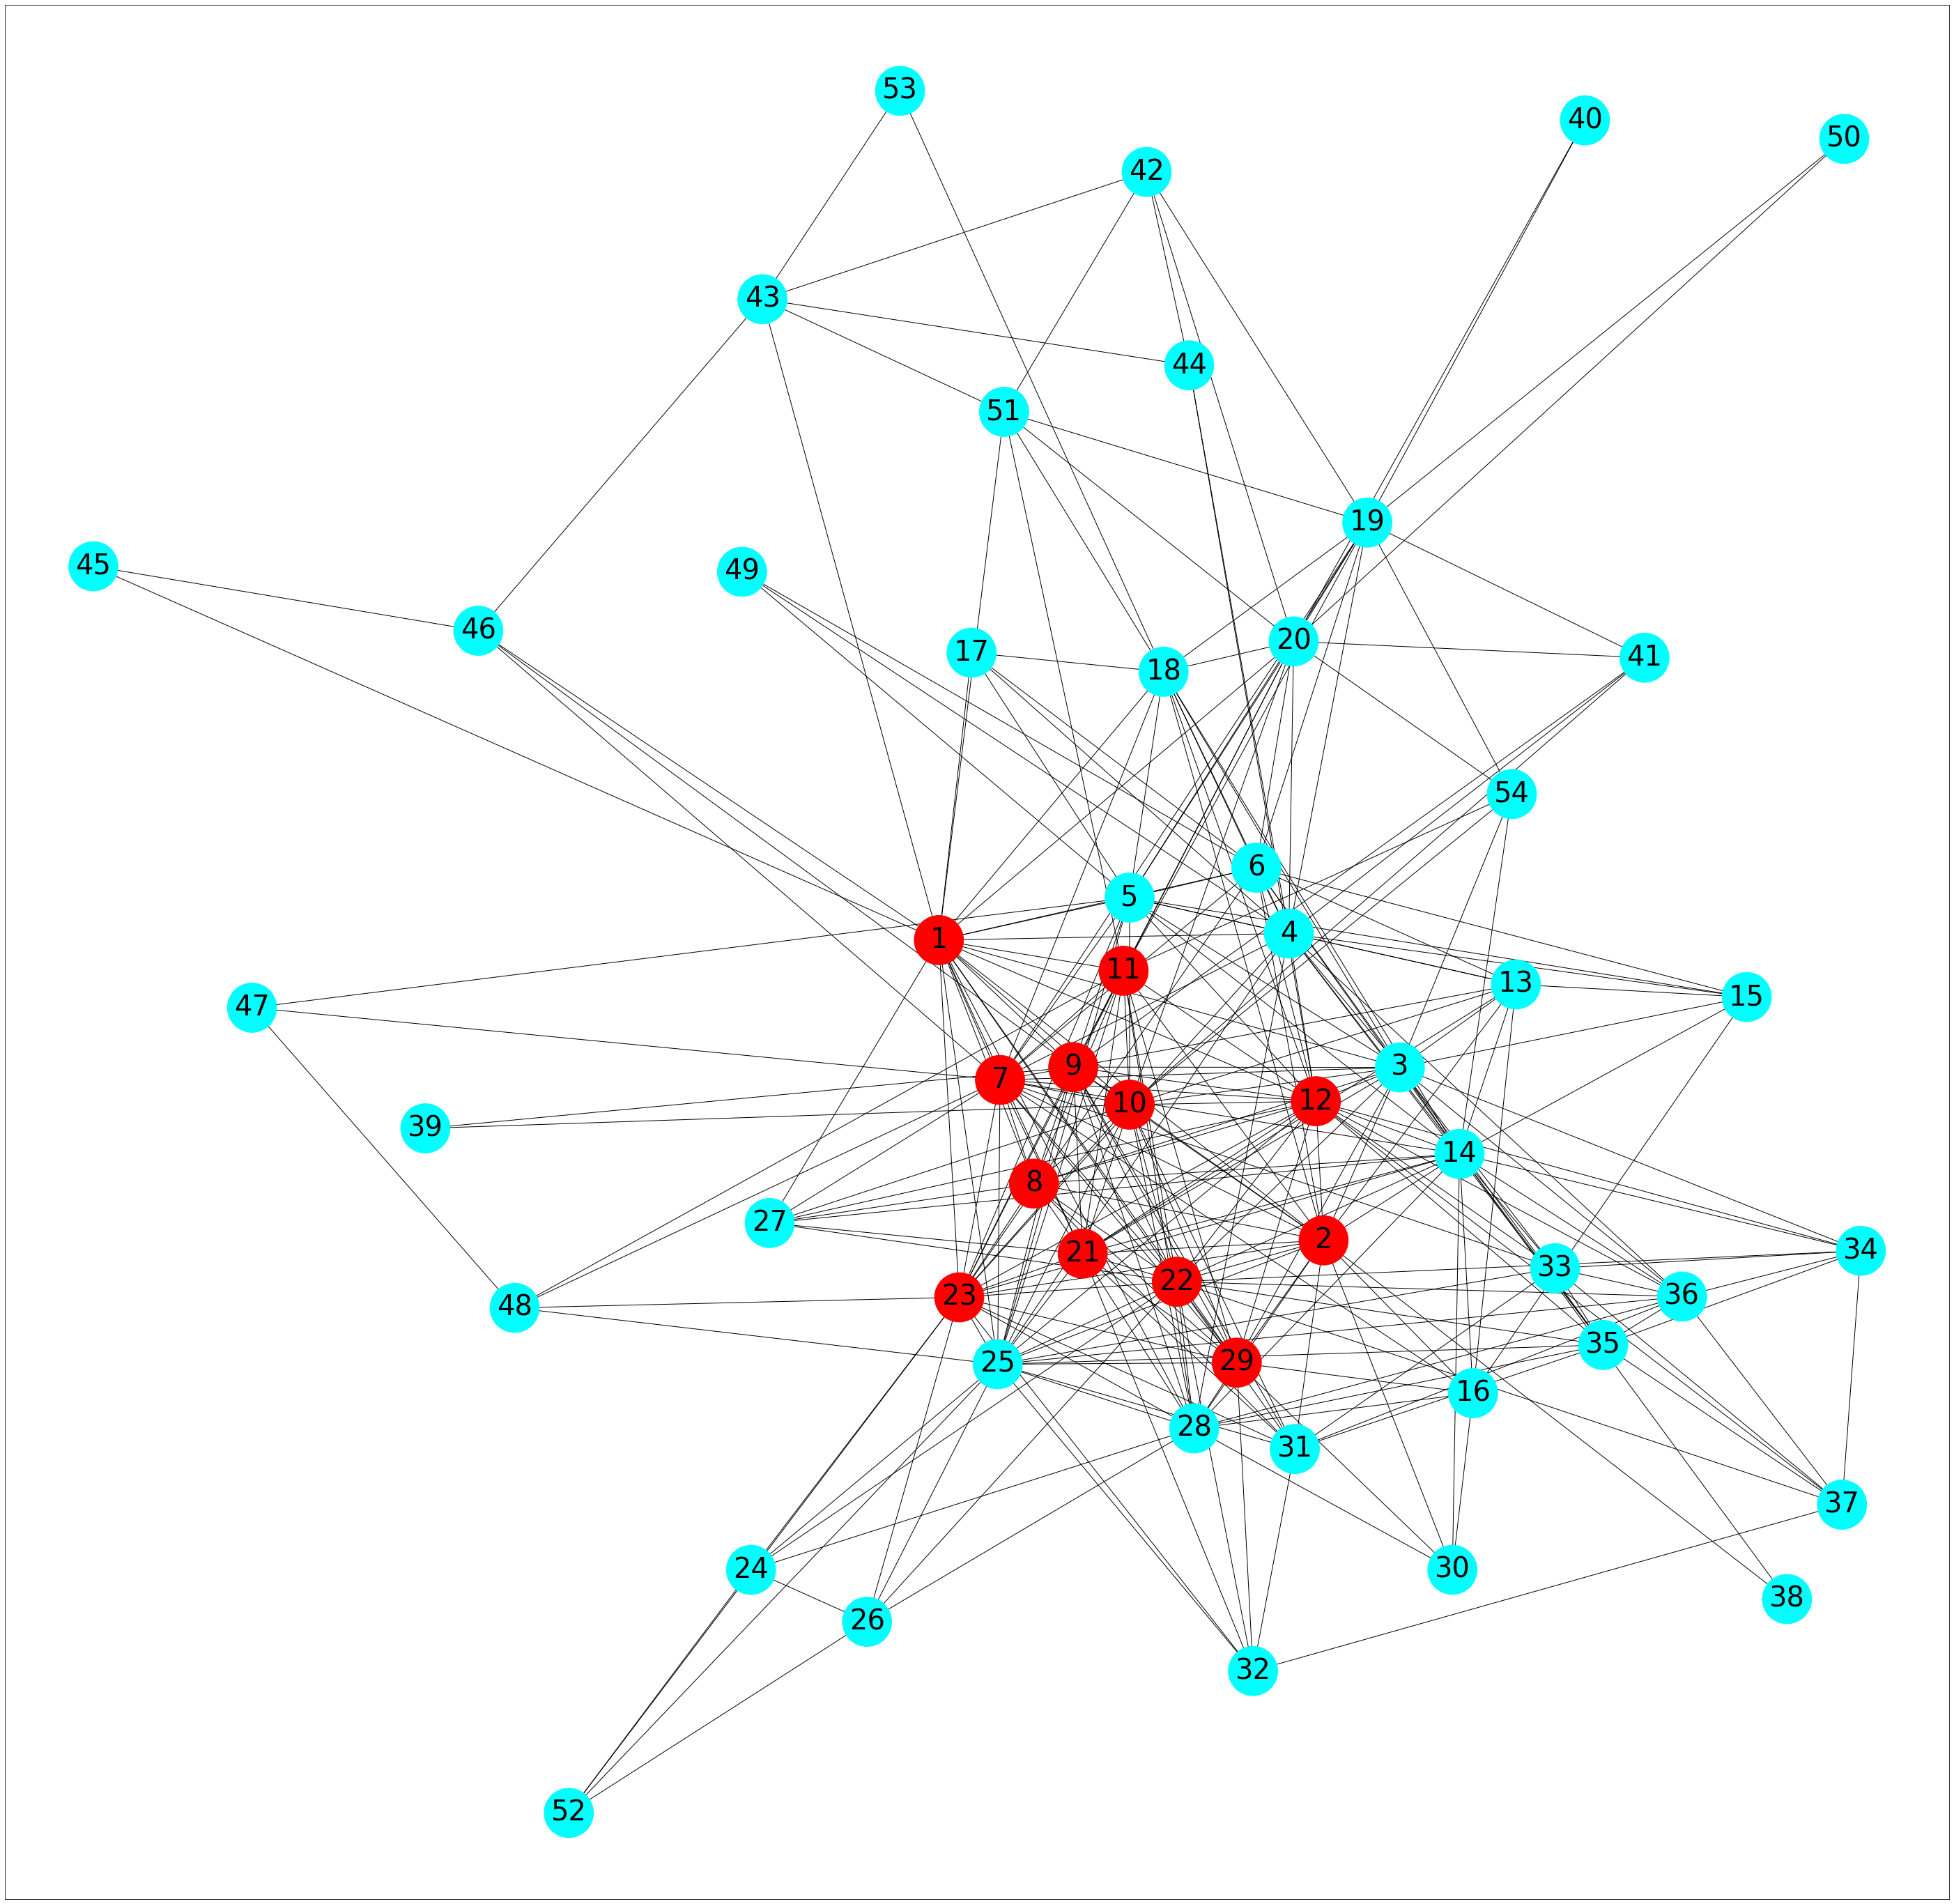

In [68]:
node_color=[]
for node in G.nodes(data=True):

    if  node[0] in max_cliques[0]:
        node_color.append('red')

    else:
        node_color.append('aqua')
np.random.seed(1)
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G, node_color=node_color, node_size =5000, font_size =40)

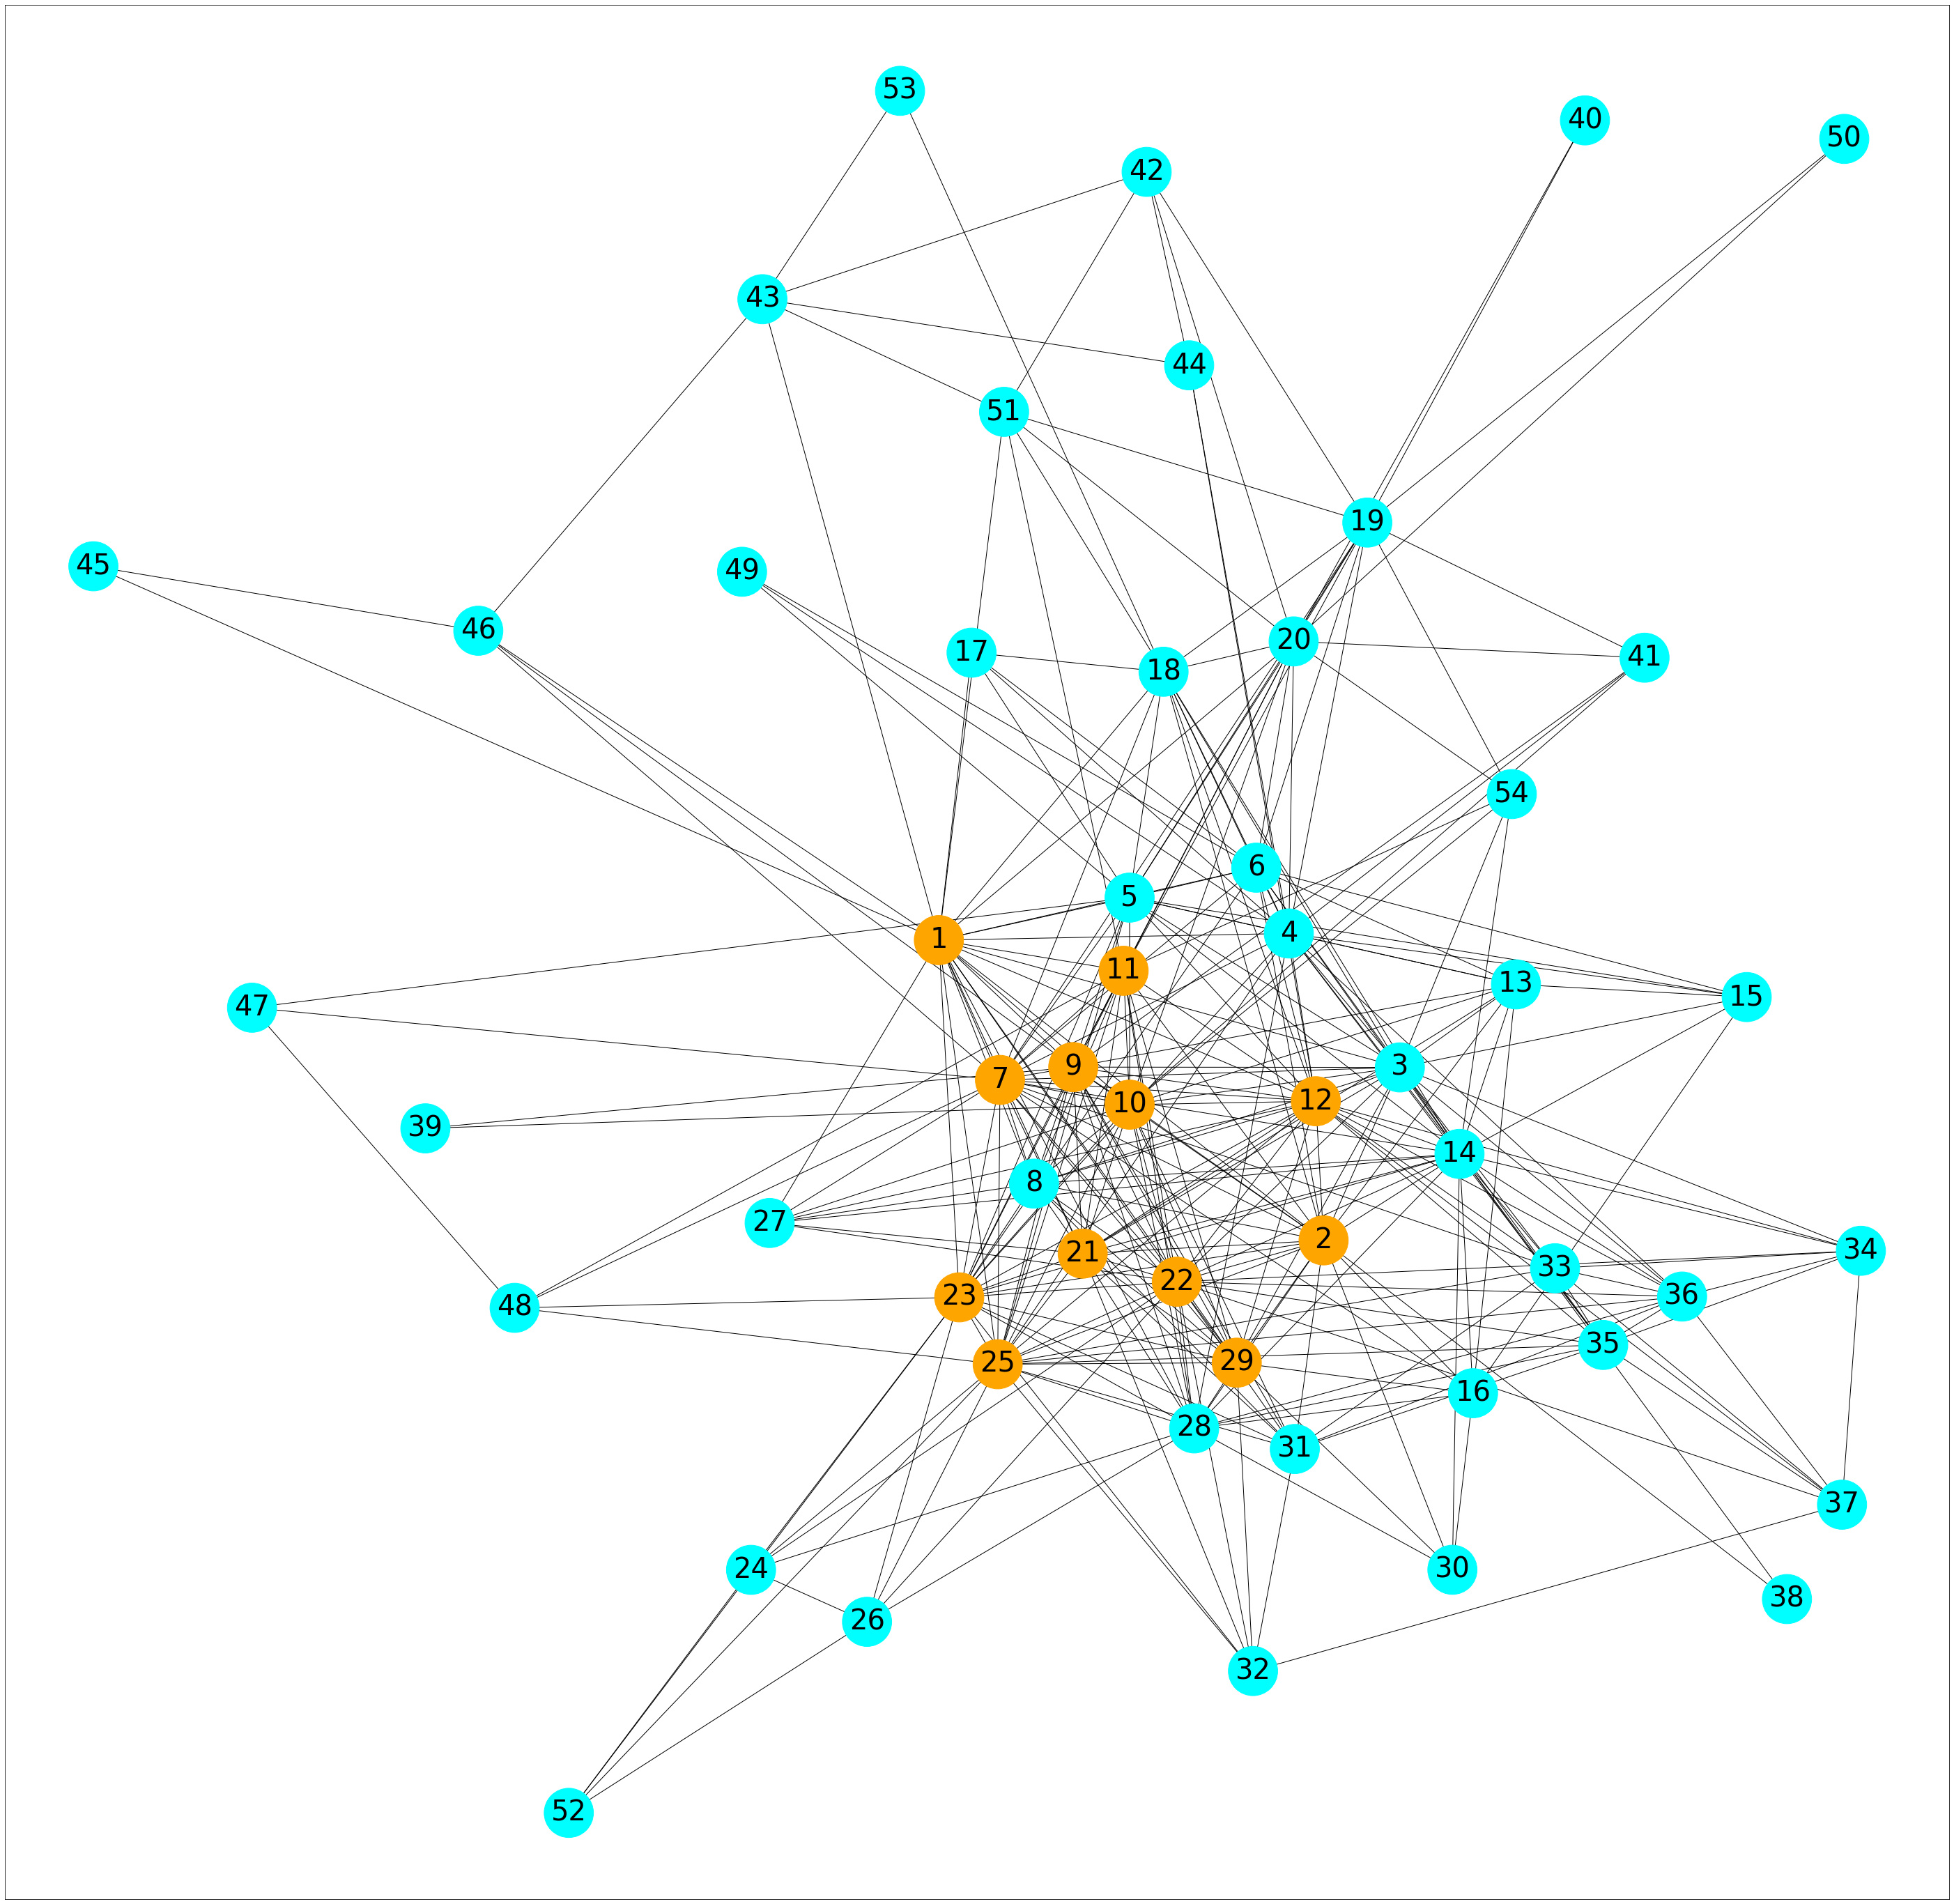

In [69]:
node_color=[]
for node in G.nodes(data=True):

    if  node[0] in max_cliques[1]:
        node_color.append('orange')

    else:
        node_color.append('aqua')
np.random.seed(1)
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G, node_color=node_color, node_size =5000, font_size =40 )
plt.show()

## Component
* The components for the co-offending relationships will be found now

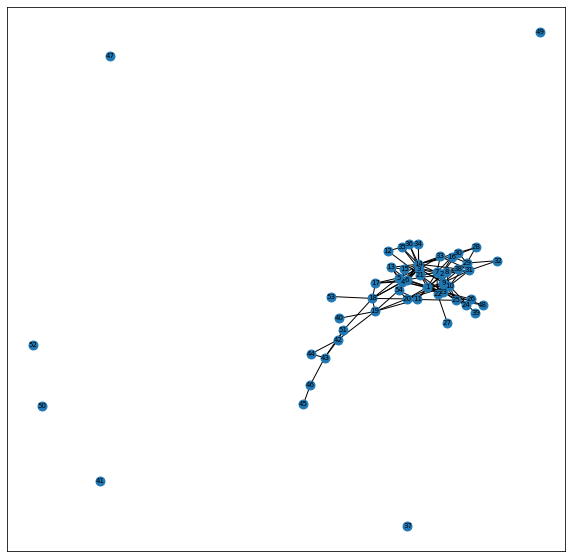

In [70]:
np.random.seed(2)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G2, node_size=80, font_size =7)
plt.show()

* Components number:

In [71]:
nx.number_connected_components(G2)

7

* Distribution of size

In [72]:
size_components = []
for x in nx.connected_components(G2):
    size_components.append(len(x))
size_components

[48, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'Counts')

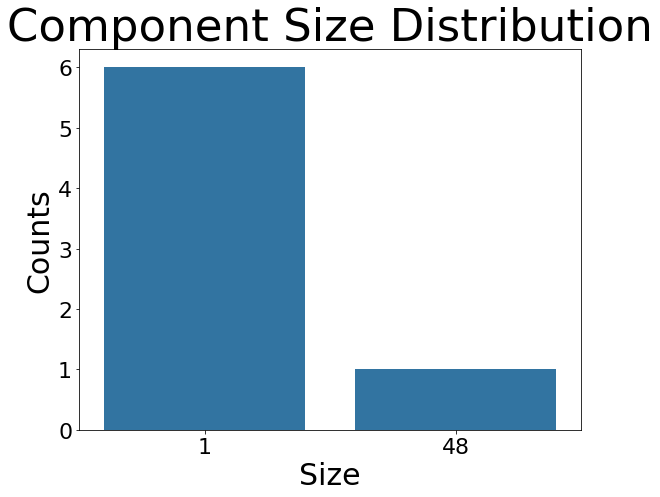

In [73]:
from collections import Counter

font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (9, 7)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= list(Counter(size_components).values()) , 
            x = list(Counter(size_components).keys()), 
            palette=['tab:blue'], )
plt.title('Component Size Distribution', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Size',fontdict ={'size': 30})
plt.ylabel('Counts',fontdict ={'size': 30})

#### Components of relationships of co-offending serious crimes

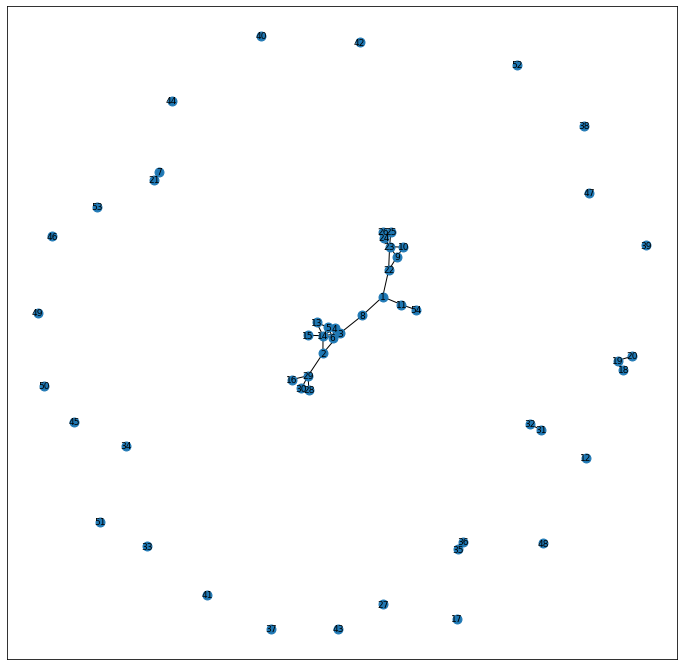

In [74]:
np.random.seed(3)
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G3, node_size=80, font_size =9)
plt.show()

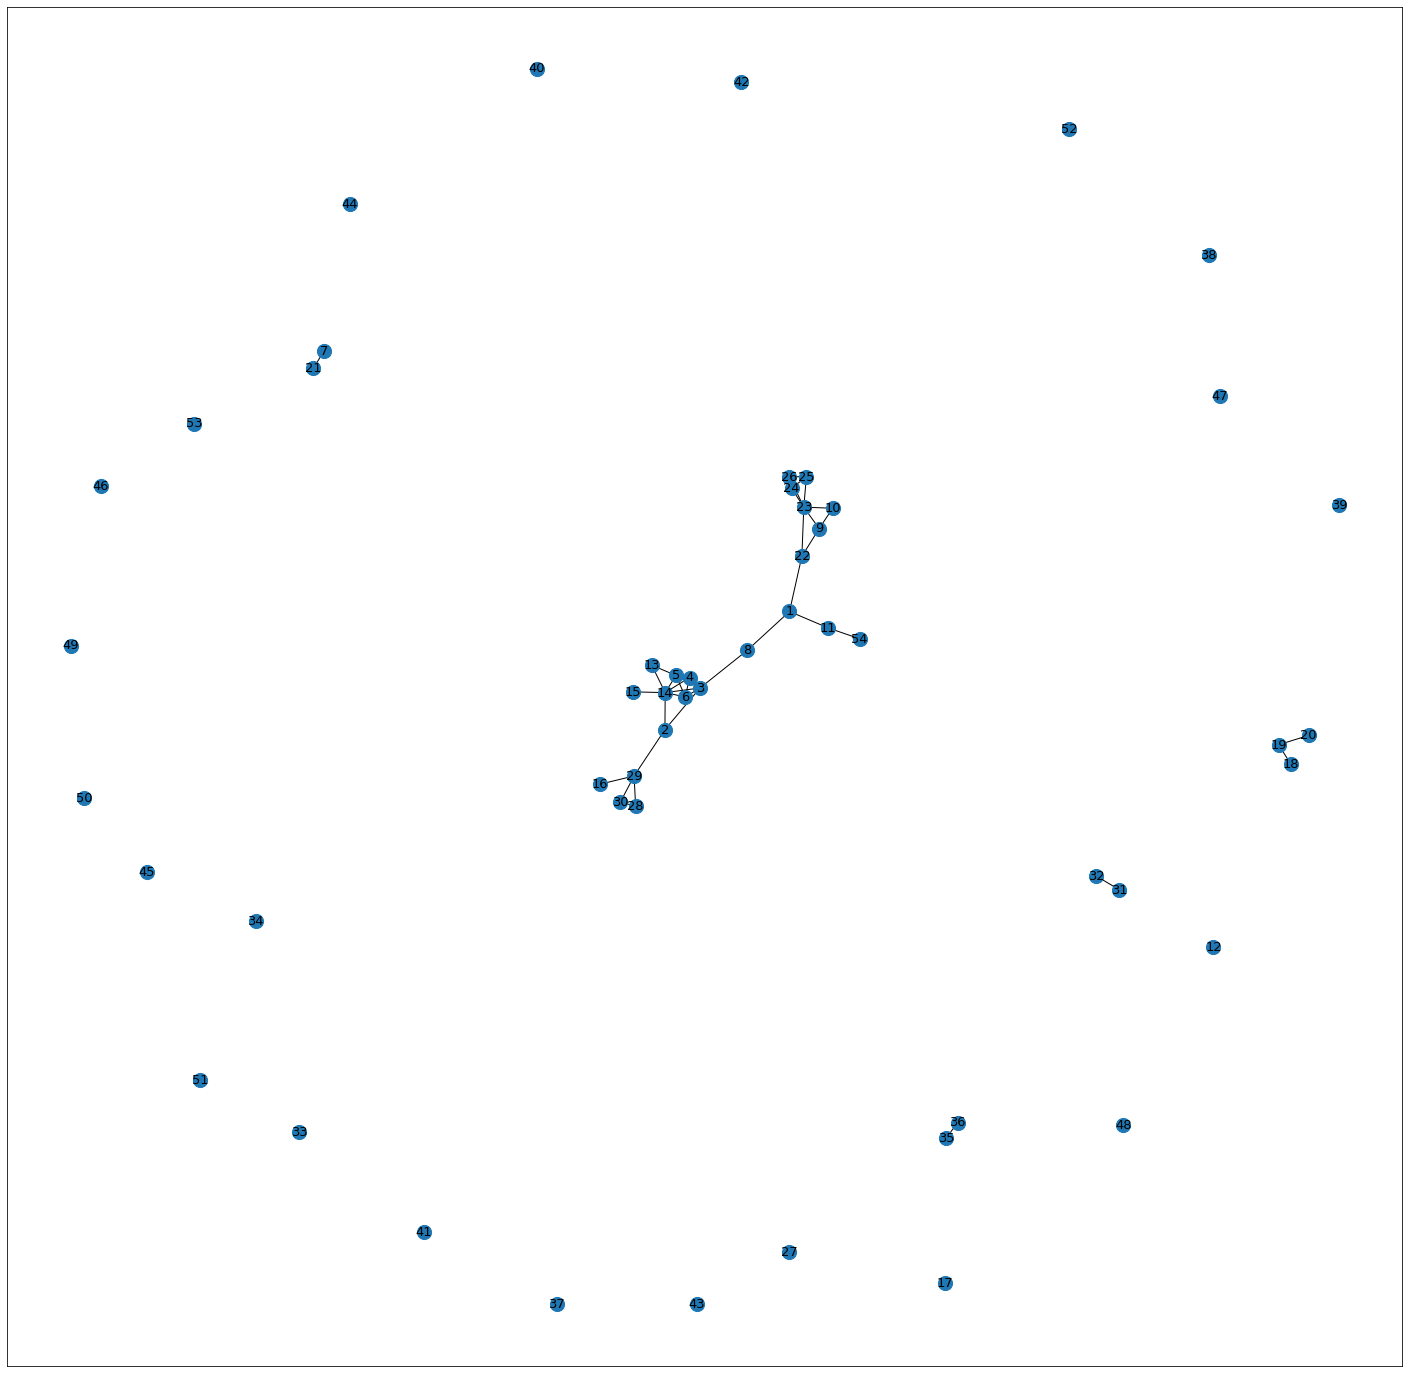

In [75]:
np.random.seed(3)
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G3, node_size=200, font_size =13)
plt.show()

* Size distribution

In [76]:
size_components2 = []
for x in nx.connected_components(G3):
    size_components2.append(len(x))

Text(0, 0.5, 'Counts')

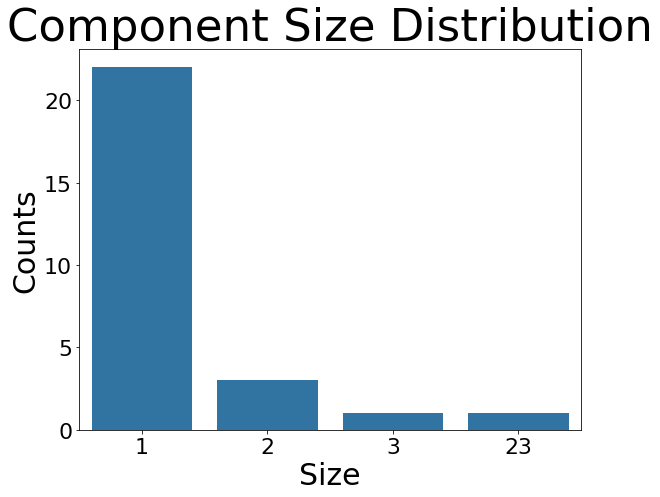

In [77]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (9, 7)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= list(Counter(size_components2).values()) , 
            x = list(Counter(size_components2).keys()), 
            palette=['tab:blue'], )
plt.title('Component Size Distribution', fontdict ={'size': 45}, loc='center') 
plt.xlabel('Size',fontdict ={'size': 30})
plt.ylabel('Counts',fontdict ={'size': 30})

In [78]:
Counter(size_components2)

Counter({23: 1, 1: 22, 2: 3, 3: 1})

## Association rules
Creating a dataframe that contains the believed background for each member. The rules are:
* A member born in East Africa, West Africa and Caribbean are surely of that background
* Members born in the UK, that the majority of their edges to a particular background, are considered of the same background (can be seen with communities)
* The rest of the members born in the UK are considered unknown background

In [79]:
background= attributes[['Id','Descript']].copy()
background = background.sort_values(by='Id')
background = background.reset_index(drop=True)
background.index += 1 #setting index to be the same as ID
background

Id     Descript
1    1  West Africa
2    2    Caribbean
3    3    Caribbean
4    4    Caribbean
5    5    Caribbean
6    6           UK
7    7  East Africa
8    8  West Africa
9    9  West Africa
10  10  West Africa
11  11  West Africa
12  12           UK
13  13           UK
14  14           UK
15  15           UK
16  16           UK
17  17    Caribbean
18  18    Caribbean
19  19    Caribbean
20  20  West Africa
21  21  West Africa
22  22  West Africa
23  23  East Africa
24  24  East Africa
25  25  East Africa
26  26  East Africa
27  27           UK
28  28           UK
29  29    Caribbean
30  30    Caribbean
31  31  West Africa
32  32  West Africa
33  33           UK
34  34           UK
35  35           UK
36  36           UK
37  37           UK
38  38    Caribbean
39  39           UK
40  40  West Africa
41  41    Caribbean
42  42           UK
43  43           UK
44  44           UK
45  45           UK
46  46           UK
47  47           UK
48  48           UK
49  49    Caribbean
50  50  West Africa
51  51           UK
52  52           UK
53  53  East Africa
54  54           UK

* Fixing the values that were born in the UK, based on the relationships they have developed and the community they belong to.

In [80]:
background.loc[47,'Descript'] = 'East Africa' #only has edges to other east african nodes
background.loc[48,'Descript'] = 'East Africa' #only has edges to other east african nodes
background.loc[52,'Descript'] = 'East Africa' #only has edges to other east african nodes
background.loc[39,'Descript'] = 'West Africa' #only has edges to other West african nodes
background.loc[27,'Descript'] = 'West Africa' #majority of edges to other West african nodes
background.loc[16,'Descript'] = 'Caribbean'   #only has edges to other Caribbean nodes
background.loc[28,'Descript'] = 'Caribbean'   #has family edges to other Caribbean nodes
background.loc[15,'Descript'] = 'Caribbean'   #majority of edges to other Caribbean nodes
background.loc[6,'Descript'] = 'Caribbean'    #majority of edges to other Caribbean nodes
background.loc[13,'Descript'] = 'Caribbean'   #majority of edges to other Caribbean nodes
uk_index = background.loc[background.Descript == 'UK'].index #setting the rest as 'unknown'
background.loc[uk_index,'Descript']='unknown'
background

Id     Descript
1    1  West Africa
2    2    Caribbean
3    3    Caribbean
4    4    Caribbean
5    5    Caribbean
6    6    Caribbean
7    7  East Africa
8    8  West Africa
9    9  West Africa
10  10  West Africa
11  11  West Africa
12  12      unknown
13  13    Caribbean
14  14      unknown
15  15    Caribbean
16  16    Caribbean
17  17    Caribbean
18  18    Caribbean
19  19    Caribbean
20  20  West Africa
21  21  West Africa
22  22  West Africa
23  23  East Africa
24  24  East Africa
25  25  East Africa
26  26  East Africa
27  27  West Africa
28  28    Caribbean
29  29    Caribbean
30  30    Caribbean
31  31  West Africa
32  32  West Africa
33  33      unknown
34  34      unknown
35  35      unknown
36  36      unknown
37  37      unknown
38  38    Caribbean
39  39  West Africa
40  40  West Africa
41  41    Caribbean
42  42      unknown
43  43      unknown
44  44      unknown
45  45      unknown
46  46      unknown
47  47  East Africa
48  48  East Africa
49  49    Caribbean
50  50  West Africa
51  51      unknown
52  52  East Africa
53  53  East Africa
54  54      unknown

* Importing the right library

In [81]:
from apyori import apriori

* Creating a list of all the edges

In [82]:
edges_list = list(nx.edges(G2))

* Creating a list containing the edges. Each edge consists of a pair of nodes. Instead of the nodes ids, we use the nodes backgrounds in order to examine the association rules for the backgrounds.

In [83]:
edges_background=[]
for edge in edges_list:
    first_background = background.loc[background.Id == edge[0]]['Descript'].values[0]
    second_background = background.loc[background.Id == edge[1]]['Descript'].values[0]
    edges_background.append([first_background,second_background])
#edges_background

* Only keeping the known background edges:

In [84]:
edges_background_known=[]
for edge in edges_background:
    if (edge[0]!='unknown') & (edge[1] != 'unknown'):
        edges_background_known.append(edge)
#edges_background_known

* Finding the association rules

In [85]:
association_rules = apriori(edges_background_known, min_support=0.05, min_confidence=0.28, min_lift=0.1, min_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'Caribbean'}), support=0.5531914893617021, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Caribbean'}), confidence=0.5531914893617021, lift=1.0)]),
 RelationRecord(items=frozenset({'West Africa'}), support=0.5319148936170213, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'West Africa'}), confidence=0.5319148936170213, lift=1.0)]),
 RelationRecord(items=frozenset({'West Africa', 'Caribbean'}), support=0.1702127659574468, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Caribbean'}), items_add=frozenset({'West Africa'}), confidence=0.30769230769230765, lift=0.5784615384615384), OrderedStatistic(items_base=frozenset({'West Africa'}), items_add=frozenset({'Caribbean'}), confidence=0.32, lift=0.5784615384615385)]),
 RelationRecord(items=frozenset({'East Africa', 'West Africa'}), support=0.1276595744680851, ordered_statistics=[OrderedStatistic(items_base=frozenset({'East Africa

* Association rule: East Africa -> East Africa

In [86]:
counter = 0
counter_sum = 0
for place in edges_background_known :
    if (place[0] == place[1]) & (place[1]=='East Africa'):
        counter+=1
    if (place[1]=='East Africa') | (place[0]=='East Africa'):
        counter_sum += 1
print('Support: '+ str(counter/len(edges_background_known)))
print('Confidence: '+ str(counter/counter_sum))

Support: 0.0851063829787234
Confidence: 0.3076923076923077


* Association rule: West Africa -> West Africa

In [87]:
counter = 0
counter_sum = 0
for place in edges_background_known :
    if (place[0] == place[1]) & (place[1]=='West Africa'):
        counter+=1
    if (place[1]=='West Africa') | (place[0]=='West Africa'):
        counter_sum += 1
print('Support: '+ str(counter/len(edges_background_known)))
print('Confidence: '+ str(counter/counter_sum))

Support: 0.23404255319148937
Confidence: 0.44


* Association rule: Caribbean -> Caribbean

In [88]:
counter = 0
counter_sum = 0
for place in edges_background_known :
    if (place[0] == place[1]) & (place[1]=='Caribbean'):
        counter+=1
    if (place[1]=='Caribbean') | (place[0]=='Caribbean'):
        counter_sum += 1
print('Support: '+ str(counter/len(edges_background_known)))
print('Confidence: '+ str(counter/counter_sum))

Support: 0.3191489361702128
Confidence: 0.5769230769230769


## CLUSTERING 
At this point a clustering will be executed in order to make different profiles for the members
* Only the numerical attributes will be used

In [89]:
cluster_attr = attributes.sort_values(by='Id', ascending=False)[['Arrests','Convictions','Age']]
#sorted values for right order in the plot

* The attributes need to be standarized in order to execute the k-means algorithm.
* StandardScaler transforms the data so that each attribute has a mean of $0$ and standard deviation of $1$

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(cluster_attr)
scaled_data = pd.DataFrame(X, index=cluster_attr.index, 
                             columns=cluster_attr.columns)
scaled_data

Arrests  Convictions       Age
47  0.171311    -0.056148  0.062541
53  1.582451     1.873303  2.689251
46 -1.396622    -1.158691 -0.687948
45 -0.926242    -0.883055 -1.063192
11 -1.083035    -0.883055 -0.312704
23 -1.083035    -1.158691 -0.312704
44  0.328105     1.322031  0.062541
43 -1.396622    -1.158691 -1.438437
42 -0.769449    -0.607420 -0.687948
41  2.052831     1.873303 -0.312704
40 -0.455862    -0.883055 -0.687948
39 -0.612655    -1.158691 -0.687948
38 -0.455862    -0.056148 -0.687948
22 -0.299069    -0.883055 -0.312704
10  1.268865     2.148938  1.188274
37 -0.926242    -0.331784  0.813029
21 -0.612655    -0.607420  0.062541
36 -0.612655    -0.883055 -1.063192
35 -0.455862    -0.607420 -1.063192
34 -0.455862    -0.331784 -0.687948
33 -1.239829    -0.883055 -1.063192
32  0.798485     0.495124 -0.687948
9   0.484898    -0.331784 -1.438437
8   0.328105    -0.056148 -1.063192
20 -0.612655    -0.331784 -0.312704
19 -0.455862    -0.331784 -0.687948
31 -1.239829    -1.158691  0.813029
30 -1.083035    -0.883055 -1.063192
52 -1.553416    -1.158691 -0.687948
51 -0.299069    -0.607420 -1.063192
50 -1.553416    -1.158691 -1.438437
49  1.425658     1.322031 -0.312704
7  -0.769449    -0.607420  0.062541
6  -0.926242     0.219488  1.188274
5  -0.299069    -0.607420  0.062541
18  1.896038     1.322031  0.062541
17  2.052831     2.424574  1.938763
16  0.641691     1.046395  2.689251
29  0.641691     0.770759 -0.312704
28  0.328105     1.322031  0.437785
27  2.052831     1.322031 -0.312704
26  1.425658     1.322031  0.437785
25 -0.769449    -0.331784  1.938763
4   0.955278     1.046395  0.437785
3   0.328105    -0.056148  1.188274
2  -0.142275    -0.331784  0.062541
1   0.798485     0.495124  0.437785
48 -0.299069    -0.883055  0.062541
24  1.112071     1.597667  1.938763
15  0.171311    -0.331784  1.563518
14 -0.299069    -0.883055  0.437785
13  0.328105    -0.056148 -0.312704
12  0.955278     0.770759  0.062541
0   0.955278    -0.056148  0.062541

* Elbow method is used in order to find the optimal number of clusters

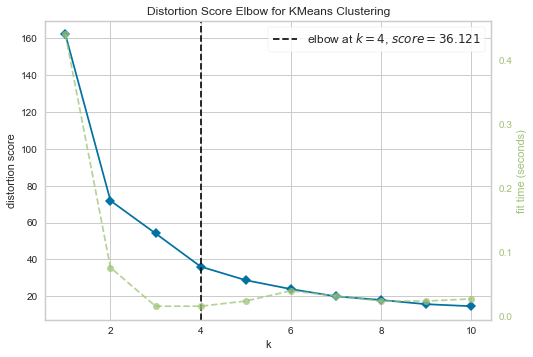

In [91]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_data)
visualizer.show()

* The kmeans algorithm is executed for $4$ clusters as the elbow method advised.

In [92]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(scaled_data)
pd.DataFrame(kmeans.cluster_centers_, columns=scaled_data.columns)

Arrests  Convictions       Age
0  1.124132     1.025192  0.004811
1 -0.377465    -0.430225  0.571801
2  1.331582     1.818175  2.088860
3 -0.726687    -0.745238 -0.841457

The centroids are the most important factor of this data mining execution. Knowing that the values are standardized, meaning they have a mean of $0$ can lead us to discover different profiles.
* The first cluster centroid describes members with far above the average number of arrests and convictions and average values of age.
* The second cluster describes members with below the average number of arrests and convictions and ages above the average 
* The third cluster describes members with far higher than the average number of arrests, convictions and age
* The fourth cluster describes members with far lower than the average number of arrests, convictions and age.

Here we can see the average numbers of each category

In [93]:
attributes[['Arrests','Convictions','Age']].mean()

Arrests         9.907407
Convictions     4.203704
Age            19.833333
dtype: float64

* The results can be visualized now:

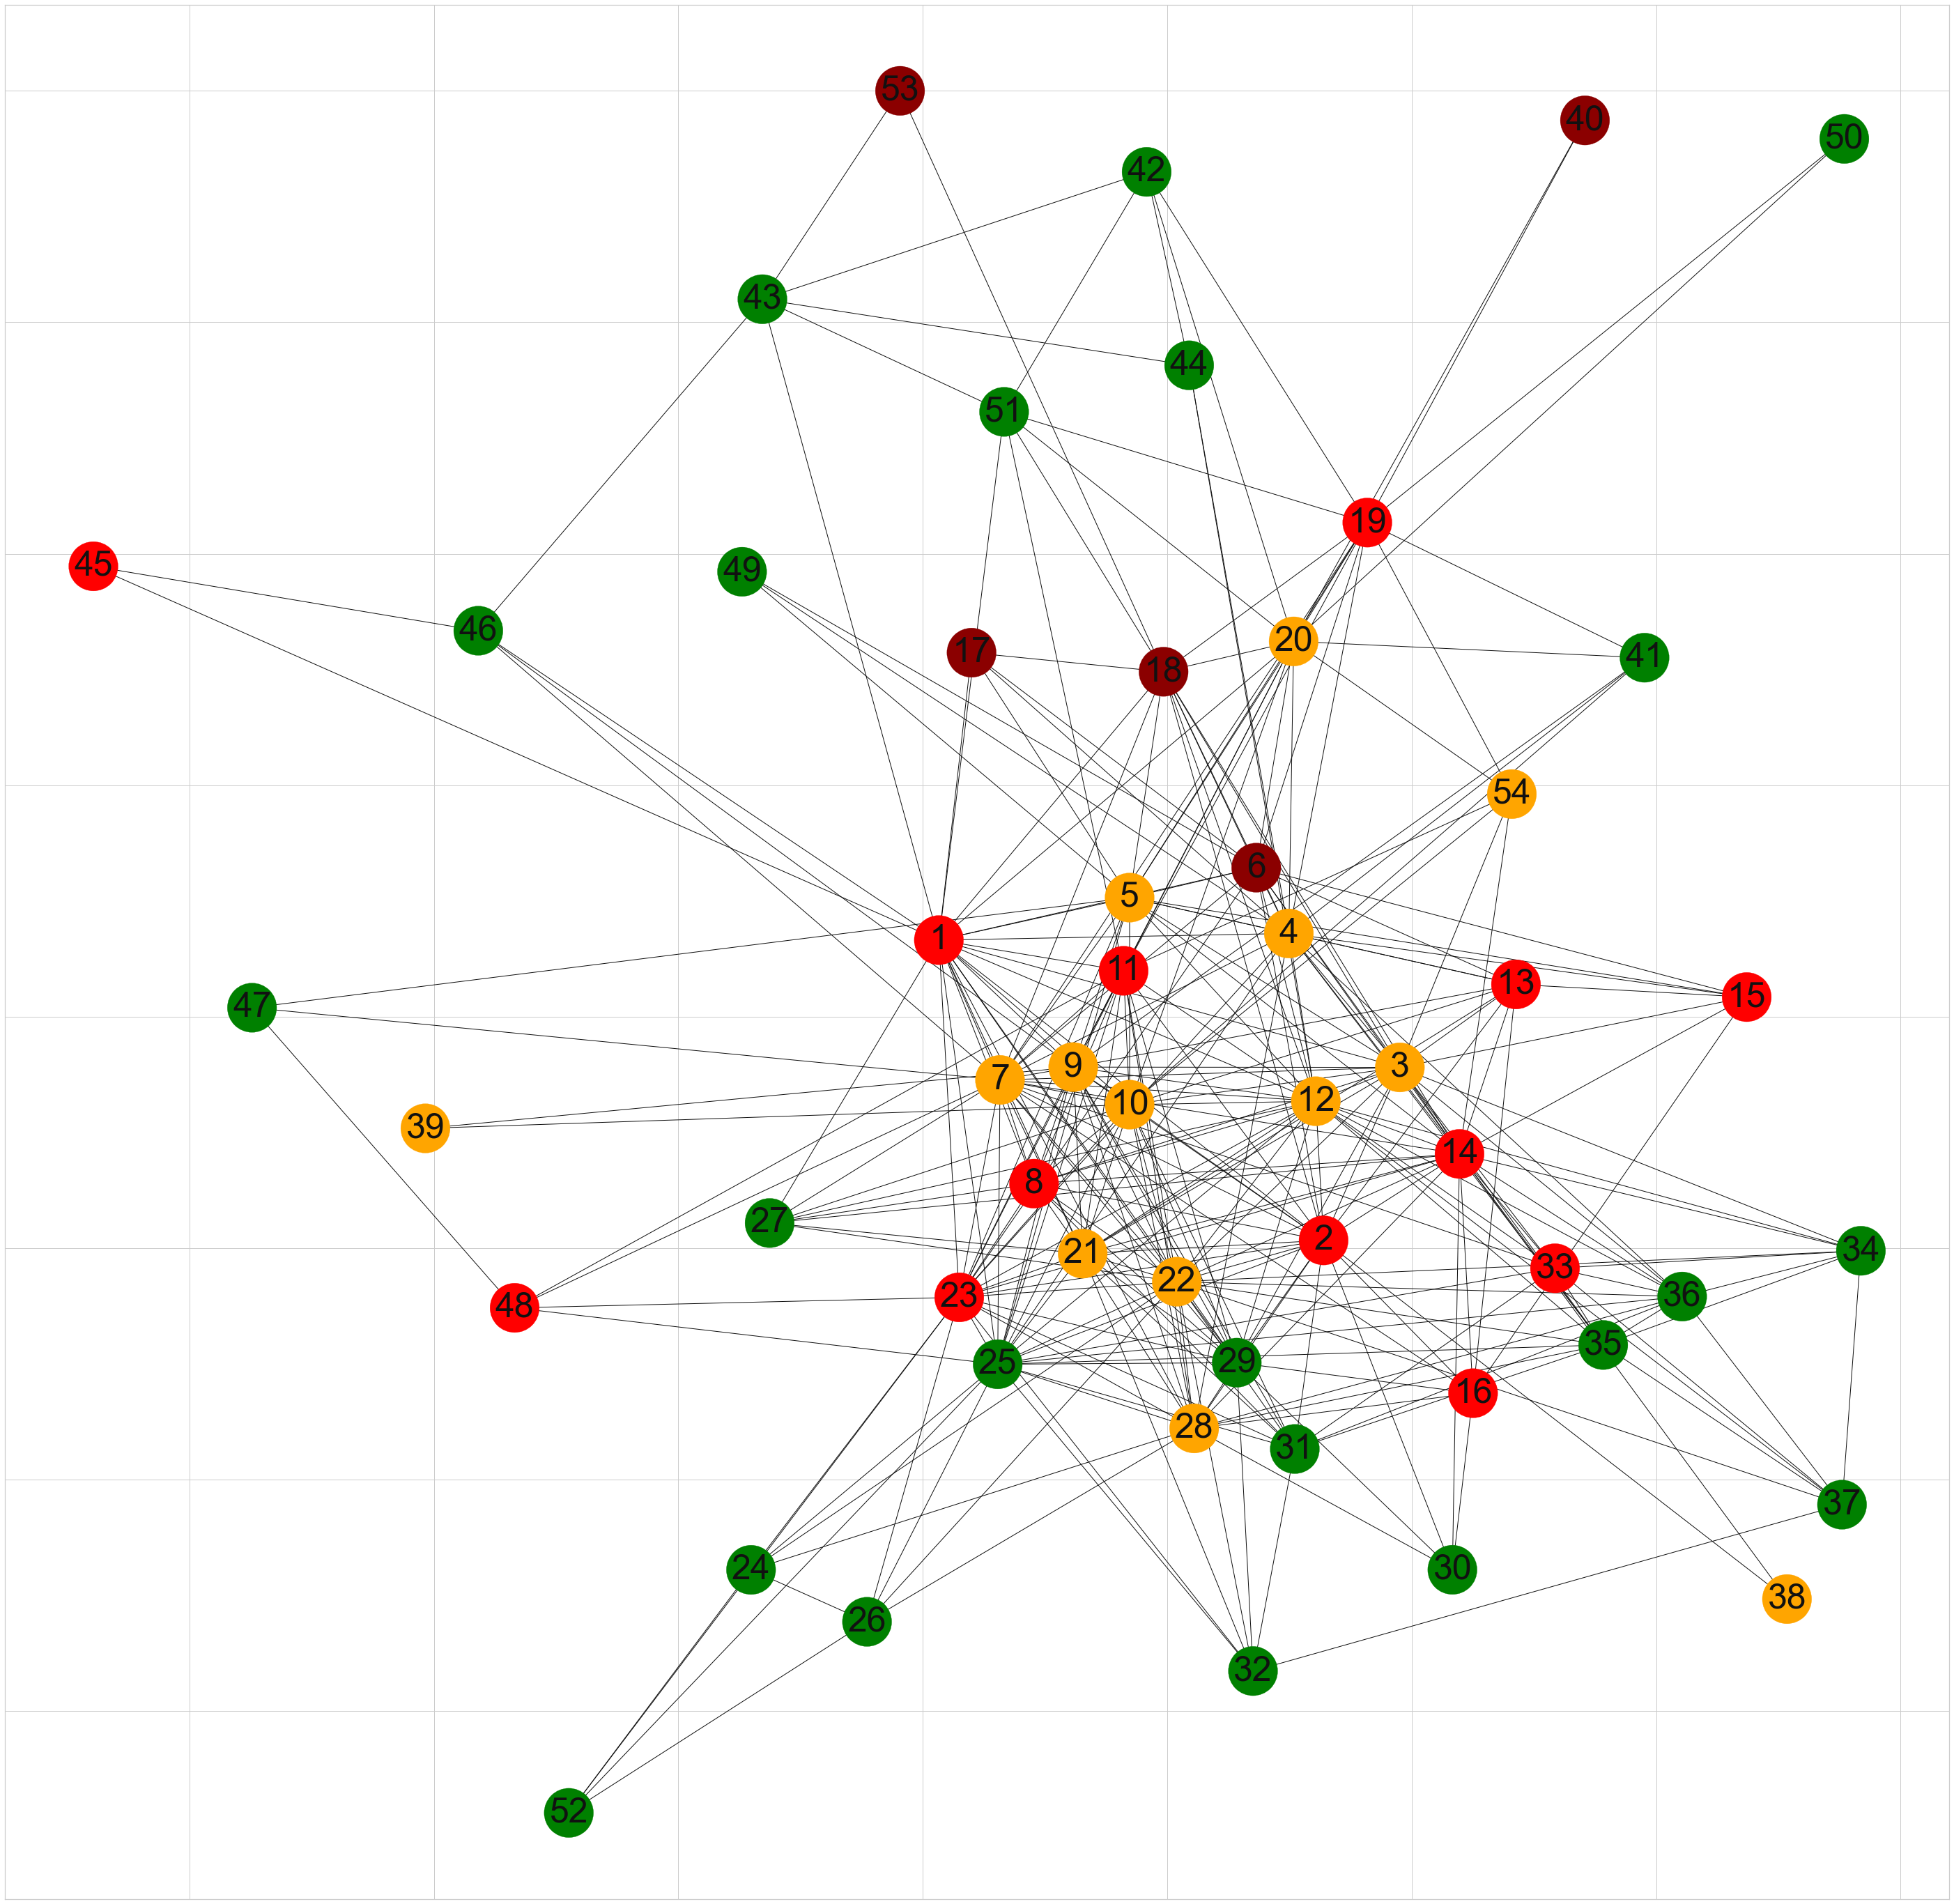

In [94]:
node_color=[]
for label in kmeans.labels_:

    if  label==0:
        node_color.append('red')

    elif label==1:
        node_color.append('orange')
    elif label==2:
        node_color.append('darkred')
    else:
        node_color.append('green')

np.random.seed(1)
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G, node_color=node_color, node_size =5000, font_size =50 )
plt.show()